# Анализ данных сердечно-сосудистых заболеваний

## Индивидуальное задание вариант 6

**Задача:** Средний возраст, вес, рост пациентов заболеванием и без

**Источник данных:** https://www.kaggle.com/datasets/colewelkins/cardiovascular-disease


## 1. Загрузка данных из HDFS

Сначала подключимся к Hadoop и загрузим данные из HDFS.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import os

# Настройка отображения
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Увеличение размера графиков
plt.rcParams['figure.figsize'] = (12, 8)


In [12]:
import os
import subprocess
import pandas as pd

# Загрузка данных из HDFS
print("Загрузка данных из HDFS...")

# Путь к данным в HDFS (правильный путь)
hdfs_path = "/user/hadoop/input/database.csv"
local_path = "/opt/database.csv"

# Скачиваем файл из HDFS
try:
    # Команда для скачивания из HDFS
    hdfs_download_cmd = f"hdfs dfs -get {hdfs_path} {local_path}"
    print(f"Выполнение команды: {hdfs_download_cmd}")
    
    # Задаем JAVA_HOME, так как Jupyter может его не видеть
    env = dict(os.environ, **{'JAVA_HOME': '/usr/lib/jvm/java-11-openjdk-amd64'})
    result = subprocess.run(hdfs_download_cmd, shell=True, capture_output=True, text=True, cwd="/opt", env=env)
    
    if result.returncode == 0:
        print(f"Данные успешно загружены из HDFS: {hdfs_path}")
    else:
        print(f"Ошибка при загрузке из HDFS: {result.stderr}")
        print("Попытка найти файл локально...")
        local_path = "/opt/data/database.csv"
        
    # Проверяем наличие файла
    if not os.path.exists(local_path):
        print(f"Файл не найден в {local_path}. Используем альтернативный путь...")
        # Исправлена синтаксическая ошибка
        local_path = "database.csv"
        
except Exception as e:
    print(f"Ошибка при выполнении subprocess: {e}")
    print("Попытка использовать локальный файл...")
    local_path = "/opt/data/database.csv"

# Проверяем наличие файла перед загрузкой
if not os.path.exists(local_path):
    print("Файл не найден. Пробуем последний вариант...")
    local_path = "database.csv"

# Финальная проверка и загрузка данных
if os.path.exists(local_path):
    df = pd.read_csv(local_path, low_memory=False)
    print(f"Размер датасета: {df.shape}")
    print(f"Данные успешно загружены из {local_path}")
    print(df.head())
else:
    print(f"ОШИБКА: Файл database.csv не найден!")
    print(f"Искали по следующим путям:")
    print(f"  - /opt/database.csv (из HDFS)")
    print(f"  - /opt/data/database.csv (локальный)")
    print(f"  - database.csv (в текущей директории)")
    df = pd.DataFrame()  # Создаем пустой DataFrame чтобы не было ошибки


Загрузка данных из HDFS...
Выполнение команды: hdfs dfs -get /user/hadoop/input/database.csv /opt/database.csv
Ошибка при загрузке из HDFS: get: `/opt/database.csv': File exists

Попытка найти файл локально...
Размер датасета: (2000000, 17)
Данные успешно загружены из /opt/data/database.csv
   id    age  gender      height     weight       ap_hi      ap_lo  \
0   0  30224       2  185.872247  85.771481  124.525640  77.236752   
1   1  22365       1  166.023821  71.808496  127.625720  75.743378   
2   2   7430       1  159.060817  63.079895  114.041389  72.331558   
3   3  11960       2  172.692436  97.999282  112.770318  65.673670   
4   4  36372       1  153.364060  61.281943  129.359811  85.363937   

   cholesterol  gluc  smoke  alco  active  age_years        bmi  \
0            2     2      0     0       0         82  24.826403   
1            2     1      1     0       0         61  26.051637   
2            1     1      0     0       0         20  24.932426   
3            1     

In [13]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка отображения
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Увеличение размера графиков
plt.rcParams['figure.figsize'] = (12, 8)

# Загрузка данных из HDFS
print("Загрузка данных из HDFS...")

# Путь к данным в HDFS (правильный путь)
hdfs_path = "/user/hadoop/input/database.csv"
local_path = "/opt/database.csv"

# Скачиваем файл из HDFS
try:
    # Команда для скачивания из HDFS
    hdfs_download_cmd = f"hdfs dfs -get {hdfs_path} {local_path}"
    print(f"Выполнение команды: {hdfs_download_cmd}")
    
    # Задаем JAVA_HOME, так как Jupyter может его не видеть
    env = dict(os.environ, **{'JAVA_HOME': '/usr/lib/jvm/java-11-openjdk-amd64'})
    result = subprocess.run(hdfs_download_cmd, shell=True, capture_output=True, text=True, cwd="/opt", env=env)
    
    if result.returncode == 0:
        print(f"Данные успешно загружены из HDFS: {hdfs_path}")
    else:
        print(f"Ошибка при загрузке из HDFS: {result.stderr}")
        print("Попытка найти файл локально...")
        local_path = "/opt/data/database.csv"
        
    # Проверяем наличие файла
    if not os.path.exists(local_path):
        print(f"Файл не найден в {local_path}. Используем альтернативный путь...")
        local_path = "database.csv"
        
except Exception as e:
    print(f"Ошибка при выполнении subprocess: {e}")
    print("Попытка использовать локальный файл...")
    local_path = "/opt/data/database.csv"

# Проверяем наличие файла перед загрузкой
if not os.path.exists(local_path):
    print("Файл не найден. Пробуем последний вариант...")
    local_path = "database.csv"

# Финальная проверка и загрузка данных
if os.path.exists(local_path):
    df = pd.read_csv(local_path, low_memory=False)
    print(f"Размер датасета: {df.shape}")
    print(f"Данные успешно загружены из {local_path}")
    print("\nПервые 5 строк данных:")
    print(df.head())
    
    # Проверяем структуру данных
    print("\nИнформация о данных:")
    print(df.info())
    
    # Проверяем наличие целевой переменной
    if 'cardio' in df.columns:
        print(f"\nРаспределение целевой переменной 'cardio':")
        print(df['cardio'].value_counts())
    else:
        print("\nСтолбцы в данных:")
        print(df.columns.tolist())
        
else:
    print(f"ОШИБКА: Файл database.csv не найден!")
    print(f"Искали по следующим путям:")
    print(f"  - /opt/database.csv (из HDFS)")
    print(f"  - /opt/data/database.csv (локальный)")
    print(f"  - database.csv (в текущей директории)")
    df = pd.DataFrame()  # Создаем пустой DataFrame чтобы не было ошибки

Загрузка данных из HDFS...
Выполнение команды: hdfs dfs -get /user/hadoop/input/database.csv /opt/database.csv
Ошибка при загрузке из HDFS: get: `/opt/database.csv': File exists

Попытка найти файл локально...
Размер датасета: (2000000, 17)
Данные успешно загружены из /opt/data/database.csv

Первые 5 строк данных:
   id    age  gender      height     weight       ap_hi      ap_lo  \
0   0  30224       2  185.872247  85.771481  124.525640  77.236752   
1   1  22365       1  166.023821  71.808496  127.625720  75.743378   
2   2   7430       1  159.060817  63.079895  114.041389  72.331558   
3   3  11960       2  172.692436  97.999282  112.770318  65.673670   
4   4  36372       1  153.364060  61.281943  129.359811  85.363937   

   cholesterol  gluc  smoke  alco  active  age_years        bmi  \
0            2     2      0     0       0         82  24.826403   
1            2     1      1     0       0         61  26.051637   
2            1     1      0     0       0         20  24.93242

## 2. Koмплексная очистка и проверка данных


In [14]:
def comprehensive_data_cleaning(df):
    """Комплексная очистка и проверка данных"""
    
    print("=" * 60)
    print("НАЧАЛО ОЧИСТКИ ДАННЫХ")
    print("=" * 60)
    
    original_shape = df.shape
    print(f"Исходный размер данных: {original_shape}")
    
    # 1. Проверка на дубликаты
    print("\n1. ПРОВЕРКА ДУБЛИКАТОВ:")
    duplicates = df.duplicated().sum()
    print(f"   Найдено дубликатов: {duplicates}")
    if duplicates > 0:
        df = df.drop_duplicates()
        print(f"   Дубликаты удалены")
    
    # 2. Проверка пропущенных значений
    print("\n2. ПРОВЕРКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ:")
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    
    missing_info = pd.DataFrame({
        'Пропущено': missing_data,
        'Процент': missing_percent.round(2)
    })
    missing_info = missing_info[missing_info['Пропущено'] > 0]
    
    if len(missing_info) > 0:
        print("   Найдены пропущенные значения:")
        print(missing_info)
        
        # Стратегии заполнения пропусков
        for column in missing_info.index:
            if df[column].dtype in ['float64', 'int64']:
                # Для числовых - медиана
                df[column].fillna(df[column].median(), inplace=True)
                print(f"   Заполнены пропуски в {column} медианой: {df[column].median():.2f}")
            else:
                # Для категориальных - мода
                mode_val = df[column].mode()[0] if not df[column].mode().empty else 'Unknown'
                df[column].fillna(mode_val, inplace=True)
                print(f"   Заполнены пропуски в {column} модой: {mode_val}")
    else:
        print("   Пропущенных значений не найдено ✓")
    
    # 3. Анализ и очистка числовых колонок
    print("\n3. ОЧИСТКА ЧИСЛОВЫХ ДАННЫХ:")
    
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    print(f"   Числовые колонки: {list(numeric_columns)}")
    
    for col in numeric_columns:
        # Проверяем на выбросы
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        if len(outliers) > 0:
            print(f"   {col}: найдено {len(outliers)} выбросов ({len(outliers)/len(df)*100:.1f}%)")
            
            # Ограничиваем выбросы вместо удаления
            df[col] = df[col].clip(lower_bound, upper_bound)
            print(f"     Выбросы ограничены значениями [{lower_bound:.2f}, {upper_bound:.2f}]")
    
    # 4. Специфичная очистка для медицинских данных
    print("\n4. СПЕЦИФИЧНАЯ ОЧИСТКА МЕДИЦИНСКИХ ДАННЫХ:")
    
    # Очистка возраста (должен быть в реалистичных пределах)
    if 'age' in df.columns:
        df = df[(df['age'] >= 365*18) & (df['age'] <= 365*100)]  # 18-100 лет в днях
        print(f"   Возраст ограничен 18-100 годами")
    
    if 'age_years' in df.columns:
        df = df[(df['age_years'] >= 18) & (df['age_years'] <= 100)]
        print(f"   Возраст в годах ограничен 18-100 годами")
    
    # Очистка роста (см)
    height_cols = [col for col in df.columns if 'height' in col.lower()]
    for col in height_cols:
        df = df[(df[col] >= 100) & (df[col] <= 250)]
        print(f"   Рост ({col}) ограничен 100-250 см")
    
    # Очистка веса (кг)
    weight_cols = [col for col in df.columns if 'weight' in col.lower()]
    for col in weight_cols:
        df = df[(df[col] >= 30) & (df[col] <= 200)]
        print(f"   Вес ({col}) ограничен 30-200 кг")
    
    # Очистка артериального давления
    if 'ap_hi' in df.columns:
        df = df[(df['ap_hi'] >= 60) & (df['ap_hi'] <= 250)]
        print(f"   Систолическое давление ограничено 60-250 мм рт.ст.")
    
    if 'ap_lo' in df.columns:
        df = df[(df['ap_lo'] >= 40) & (df['ap_lo'] <= 150)]
        print(f"   Диастолическое давление ограничено 40-150 мм рт.ст.")
    # 5. Проверка категориальных переменных
    print("\n5. ПРОВЕРКА КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ:")
    
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        unique_vals = df[col].nunique()
        print(f"   {col}: {unique_vals} уникальных значений")
        
        # Если слишком много уникальных значений, возможно это текстовая ошибка
        if unique_vals > 50:
            print(f"     ВНИМАНИЕ: Много уникальных значений, возможно ошибка данных")
    
    # 6. Проверка бинарных переменных
    print("\n6. ПРОВЕРКА БИНАРНЫХ ПЕРЕМЕННЫХ:")
    
    # Ищем колонки которые должны быть бинарными (0/1)
    potential_binary = []
    for col in numeric_columns:
        unique_vals = df[col].unique()
        if len(unique_vals) <= 3 and set(unique_vals).issubset({0, 1, -1, np.nan}):
            potential_binary.append(col)
    
    if potential_binary:
        print(f"   Потенциальные бинарные переменные: {potential_binary}")
        
        # Очищаем бинарные переменные
        for col in potential_binary:
            # Заменяем не-0/1 значения
            df[col] = df[col].apply(lambda x: 1 if x > 0.5 else 0 if pd.notna(x) else 0)
            print(f"     {col} преобразована в бинарную (0/1)")
    
    # 7. Финальная проверка
    print("\n7. ФИНАЛЬНАЯ ПРОВЕРКА:")
    final_shape = df.shape
    rows_removed = original_shape[0] - final_shape[0]
    cols_removed = original_shape[1] - final_shape[1]
    
    print(f"   Удалено строк: {rows_removed}")
    print(f"   Удалено колонок: {cols_removed}")
    print(f"   Финальный размер: {final_shape}")
    print(f"   Сохранено данных: {final_shape[0]/original_shape[0]*100:.1f}%")
    
    # Проверка распределения целевой переменной
    if 'cardio' in df.columns:
        cardio_dist = df['cardio'].value_counts(normalize=True) * 100
        print(f"\n   Распределение целевой переменной 'cardio':")
        for val, perc in cardio_dist.items():
            print(f"     {val}: {perc:.1f}%")
    
    print("\n" + "=" * 60)
    print("ОЧИСТКА ДАННЫХ ЗАВЕРШЕНА")
    print("=" * 60)
    
    return df

# Применяем очистку к нашим данным
if not df.empty:
    print("Начинаем очистку данных...")
    df_clean = comprehensive_data_cleaning(df)
else:
    print("Нет данных для очистки")
    df_clean = df

Начинаем очистку данных...
НАЧАЛО ОЧИСТКИ ДАННЫХ
Исходный размер данных: (2000000, 17)

1. ПРОВЕРКА ДУБЛИКАТОВ:
   Найдено дубликатов: 0

2. ПРОВЕРКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ:
   Пропущенных значений не найдено ✓

3. ОЧИСТКА ЧИСЛОВЫХ ДАННЫХ:
   Числовые колонки: ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_years', 'bmi', 'bp_category_encoded', 'cardio']
   height: найдено 1993 выбросов (0.1%)
     Выбросы ограничены значениями [141.01, 195.29]
   weight: найдено 9734 выбросов (0.5%)
     Выбросы ограничены значениями [35.19, 108.69]
   ap_hi: найдено 6135 выбросов (0.3%)
     Выбросы ограничены значениями [92.36, 152.65]
   ap_lo: найдено 9099 выбросов (0.5%)
     Выбросы ограничены значениями [57.14, 97.88]
   smoke: найдено 443114 выбросов (22.2%)
     Выбросы ограничены значениями [0.00, 0.00]
   alco: найдено 344285 выбросов (17.2%)
     Выбросы ограничены значениями [0.00, 0.00]
   bmi: найдено 17094 выбросов (0.9

In [9]:
def data_quality_report(df_clean):
    """Детальный отчет о качестве данных после очистки"""
    
    print("=" * 60)
    print("ОТЧЕТ О КАЧЕСТВЕ ДАННЫХ")
    print("=" * 60)
    
    # 1. Базовая информация
    print(f"Общее количество записей: {len(df_clean):,}")
    print(f"Количество признаков: {len(df_clean.columns)}")
    
    # 2. Типы данных
    print("\nТИПЫ ДАННЫХ:")
    dtypes_count = df_clean.dtypes.value_counts()
    for dtype, count in dtypes_count.items():
        print(f"  {dtype}: {count} колонок")
    
    # 3. Статистика по числовым признакам
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\nСТАТИСТИКА ПО ЧИСЛОВЫМ ПРИЗНАКАМ ({len(numeric_cols)}):")
        
        stats_df = df_clean[numeric_cols].describe().T
        stats_df['missing'] = df_clean[numeric_cols].isnull().sum()
        stats_df['missing_percent'] = (stats_df['missing'] / len(df_clean)) * 100
        stats_df['zeros'] = (df_clean[numeric_cols] == 0).sum()
        stats_df['zeros_percent'] = (stats_df['zeros'] / len(df_clean)) * 100
        
        print(stats_df[['count', 'mean', 'std', 'min', '50%', 'max', 'missing_percent']].round(2))
    
    # 4. Проверка медицинской логики
    print("\nПРОВЕРКА МЕДИЦИНСКОЙ ЛОГИКИ:")
    
    # Проверка корреляции давления
    if 'ap_hi' in df_clean.columns and 'ap_lo' in df_clean.columns:
        invalid_bp = df_clean[df_clean['ap_hi'] <= df_clean['ap_lo']]
        if len(invalid_bp) > 0:
            print(f"Найдено {len(invalid_bp)} записей где систолическое ≤ диастолическому")
        else:
            print(f"Давление: систолическое > диастолическое")
    
    # Проверка BMI
    if 'weight' in df_clean.columns and 'height' in df_clean.columns:
        calculated_bmi = df_clean['weight'] / ((df_clean['height'] / 100) ** 2)
        if 'bmi' in df_clean.columns:
            bmi_diff = abs(calculated_bmi - df_clean['bmi']).mean()
            print(f"  ✓ Средняя разница расчетного и заданного BMI: {bmi_diff:.2f}")
    
    # 5. Проверка распределений
    print("\nАНАЛИЗ РАСПРЕДЕЛЕНИЙ:")
    
    # Проверка на нормальность для ключевых числовых признаков
    key_numeric = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo']
    available_key = [col for col in key_numeric if col in df_clean.columns]
    
    for col in available_key[:3]:  # Проверяем первые 3
        skewness = df_clean[col].skew()
        if abs(skewness) > 1:
            print(f"  {col}: сильное смещение (skewness = {skewness:.2f})")
        elif abs(skewness) > 0.5:
            print(f"  {col}: умеренное смещение (skewness = {skewness:.2f})")
        else:
            print(f"  {col}: распределение близко к нормальному (skewness = {skewness:.2f})")
    
    # 6. Проверка целевой переменной
    if 'cardio' in df_clean.columns:
        print(f"\nАНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:")
        cardio_balance = df_clean['cardio'].value_counts(normalize=True)
        print(f"  Распределение: {cardio_balance[0]:.1%} без болезни, {cardio_balance[1]:.1%} с болезнью")
        
        if abs(cardio_balance[0] - cardio_balance[1]) > 0.2:
            print("Дисбаланс классов - может потребоваться балансировка")
        else:
            print("Классы сбалансированы")
    
    print("\n" + "=" * 60)
    print("ОТЧЕТ ЗАВЕРШЕН")
    print("=" * 60)

# Запускаем отчет о качестве
if not df_clean.empty:
    data_quality_report(df_clean)

ОТЧЕТ О КАЧЕСТВЕ ДАННЫХ
Общее количество записей: 2,000,000
Количество признаков: 17

ТИПЫ ДАННЫХ:
  int64: 11 колонок
  float64: 5 колонок
  object: 1 колонок

СТАТИСТИКА ПО ЧИСЛОВЫМ ПРИЗНАКАМ (16):
                         count       mean        std      min        50%  \
id                   2000000.0  999999.50  577350.41     0.00  999999.50   
age                  2000000.0   21548.90    8640.11  6570.00   21552.00   
gender               2000000.0       1.48       0.50     1.00       1.00   
height               2000000.0     168.24       9.18   141.01     167.65   
weight               2000000.0      72.19      13.25    35.19      71.48   
ap_hi                2000000.0     122.51      10.76    92.36     122.51   
ap_lo                2000000.0      77.51       7.38    57.14      77.51   
cholesterol          2000000.0       1.55       0.67     1.00       1.00   
gluc                 2000000.0       1.38       0.62     1.00       1.00   
smoke                2000000.0       0.0

Визуализация распределений данных...


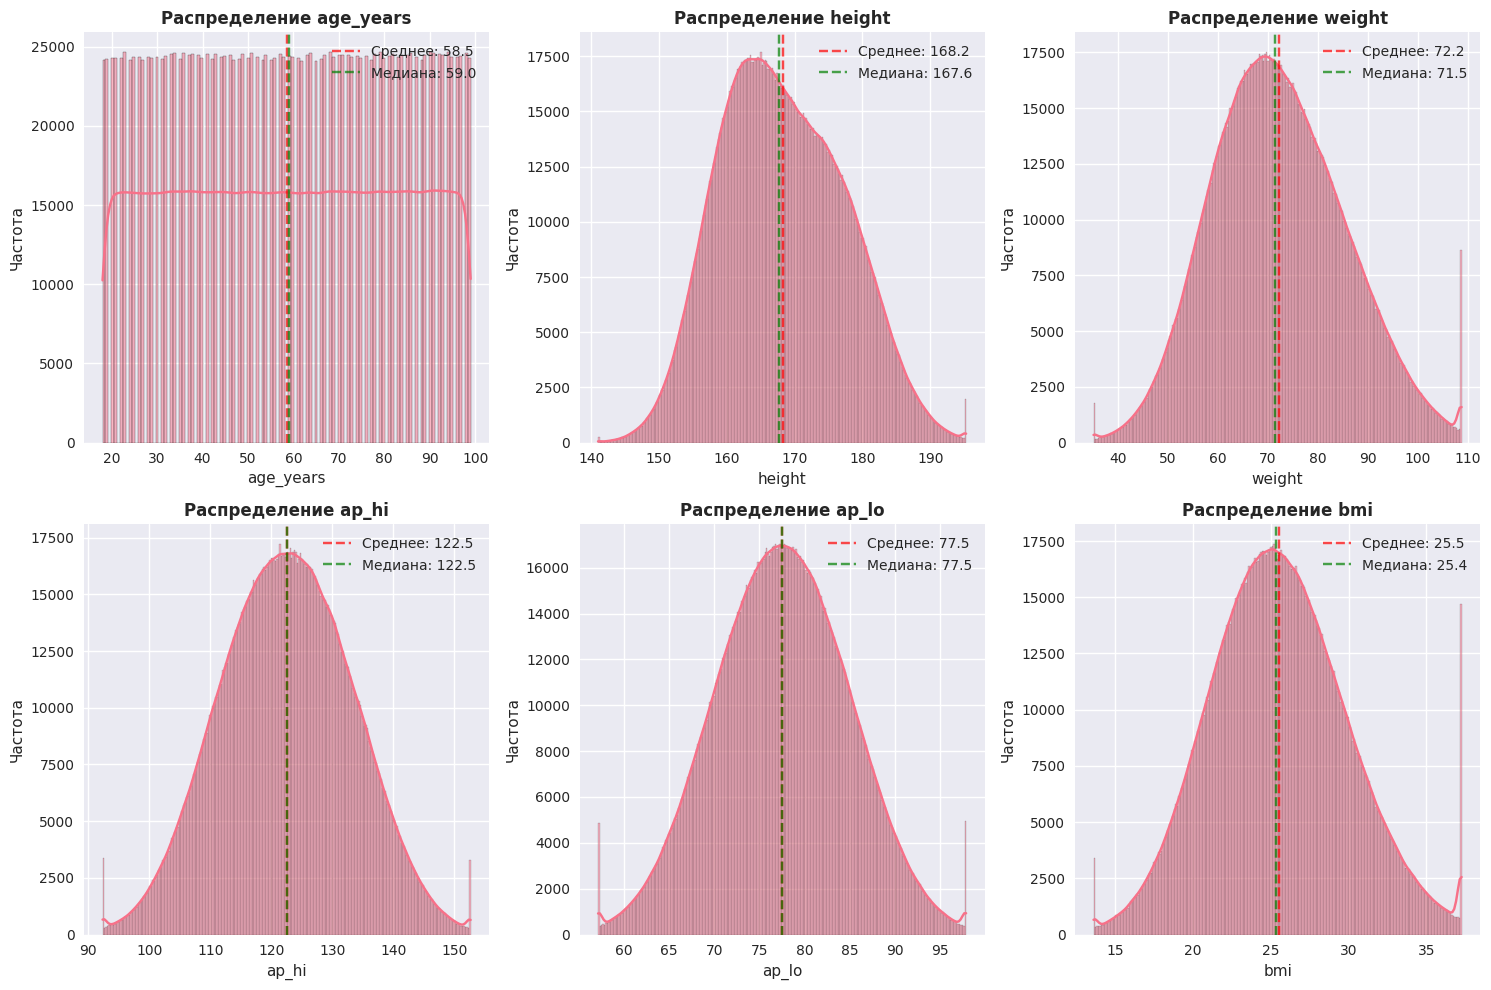

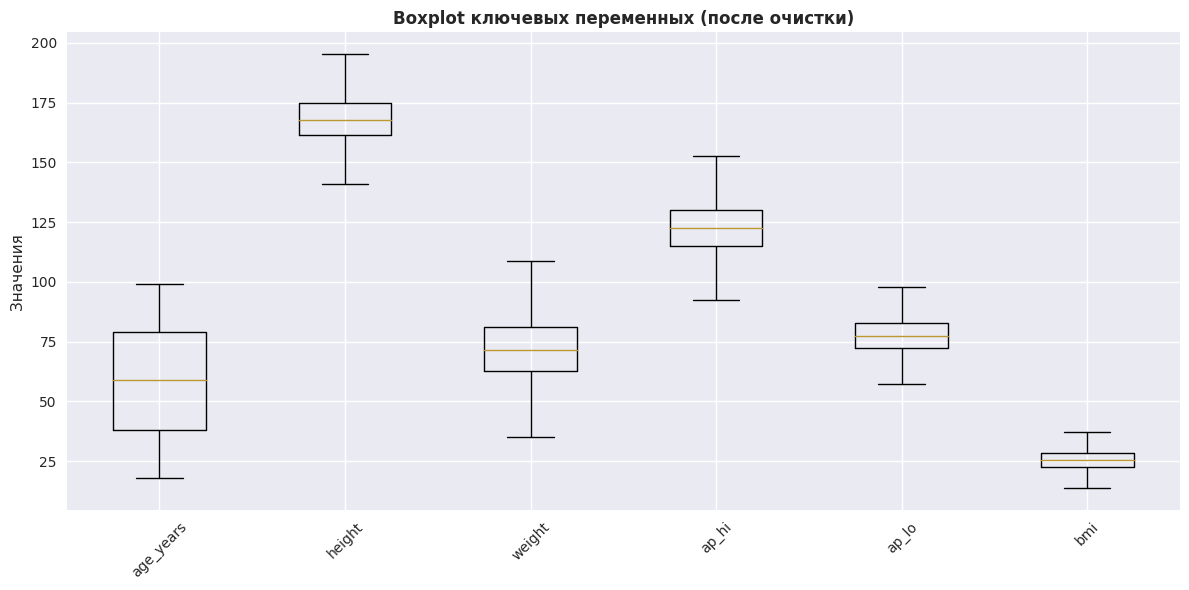

In [15]:
def visualize_data_distributions(df_clean):
    """Визуализация распределений после очистки"""
    
    print("Визуализация распределений данных...")
    
    # Выбираем ключевые числовые колонки для визуализации
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    key_columns = [col for col in ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi'] 
                  if col in numeric_cols]
    
    if len(key_columns) == 0:
        print("Не найдено ключевых колонок для визуализации")
        return
    
    # Создаем subplots
    n_cols = min(3, len(key_columns))
    n_rows = (len(key_columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(key_columns):
        if i < len(axes):
            # Гистограмма с KDE
            sns.histplot(data=df_clean, x=col, kde=True, ax=axes[i])
            axes[i].set_title(f'Распределение {col}', fontweight='bold')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Частота')
            
            # Добавляем статистику на график
            mean_val = df_clean[col].mean()
            median_val = df_clean[col].median()
            axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Среднее: {mean_val:.1f}')
            axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Медиана: {median_val:.1f}')
            axes[i].legend()
    
    # Скрываем лишние subplots
    for i in range(len(key_columns), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Boxplot для выбросов - ИСПРАВЛЕННАЯ СТРОКА
    if len(key_columns) > 0:
        fig, ax = plt.subplots(figsize=(12, 6))
        data_to_plot = [df_clean[col] for col in key_columns]
        ax.boxplot(data_to_plot, labels=key_columns)  # ИСПРАВЛЕНО: key_columns вместо key_plots
        ax.set_title('Boxplot ключевых переменных (после очистки)', fontweight='bold')
        ax.set_ylabel('Значения')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Запускаем исправленную визуализацию
if not df_clean.empty:
    visualize_data_distributions(df_clean)

## 3. MapReduce анализ на очищенных данных


Запуск MapReduce анализа...
MAPREDUCE АНАЛИЗ СРЕДНИХ ПОКАЗАТЕЛЕЙ
Запуск анализа...
Пациентов с заболеванием: 746,877
Пациентов без заболевания: 1,253,123


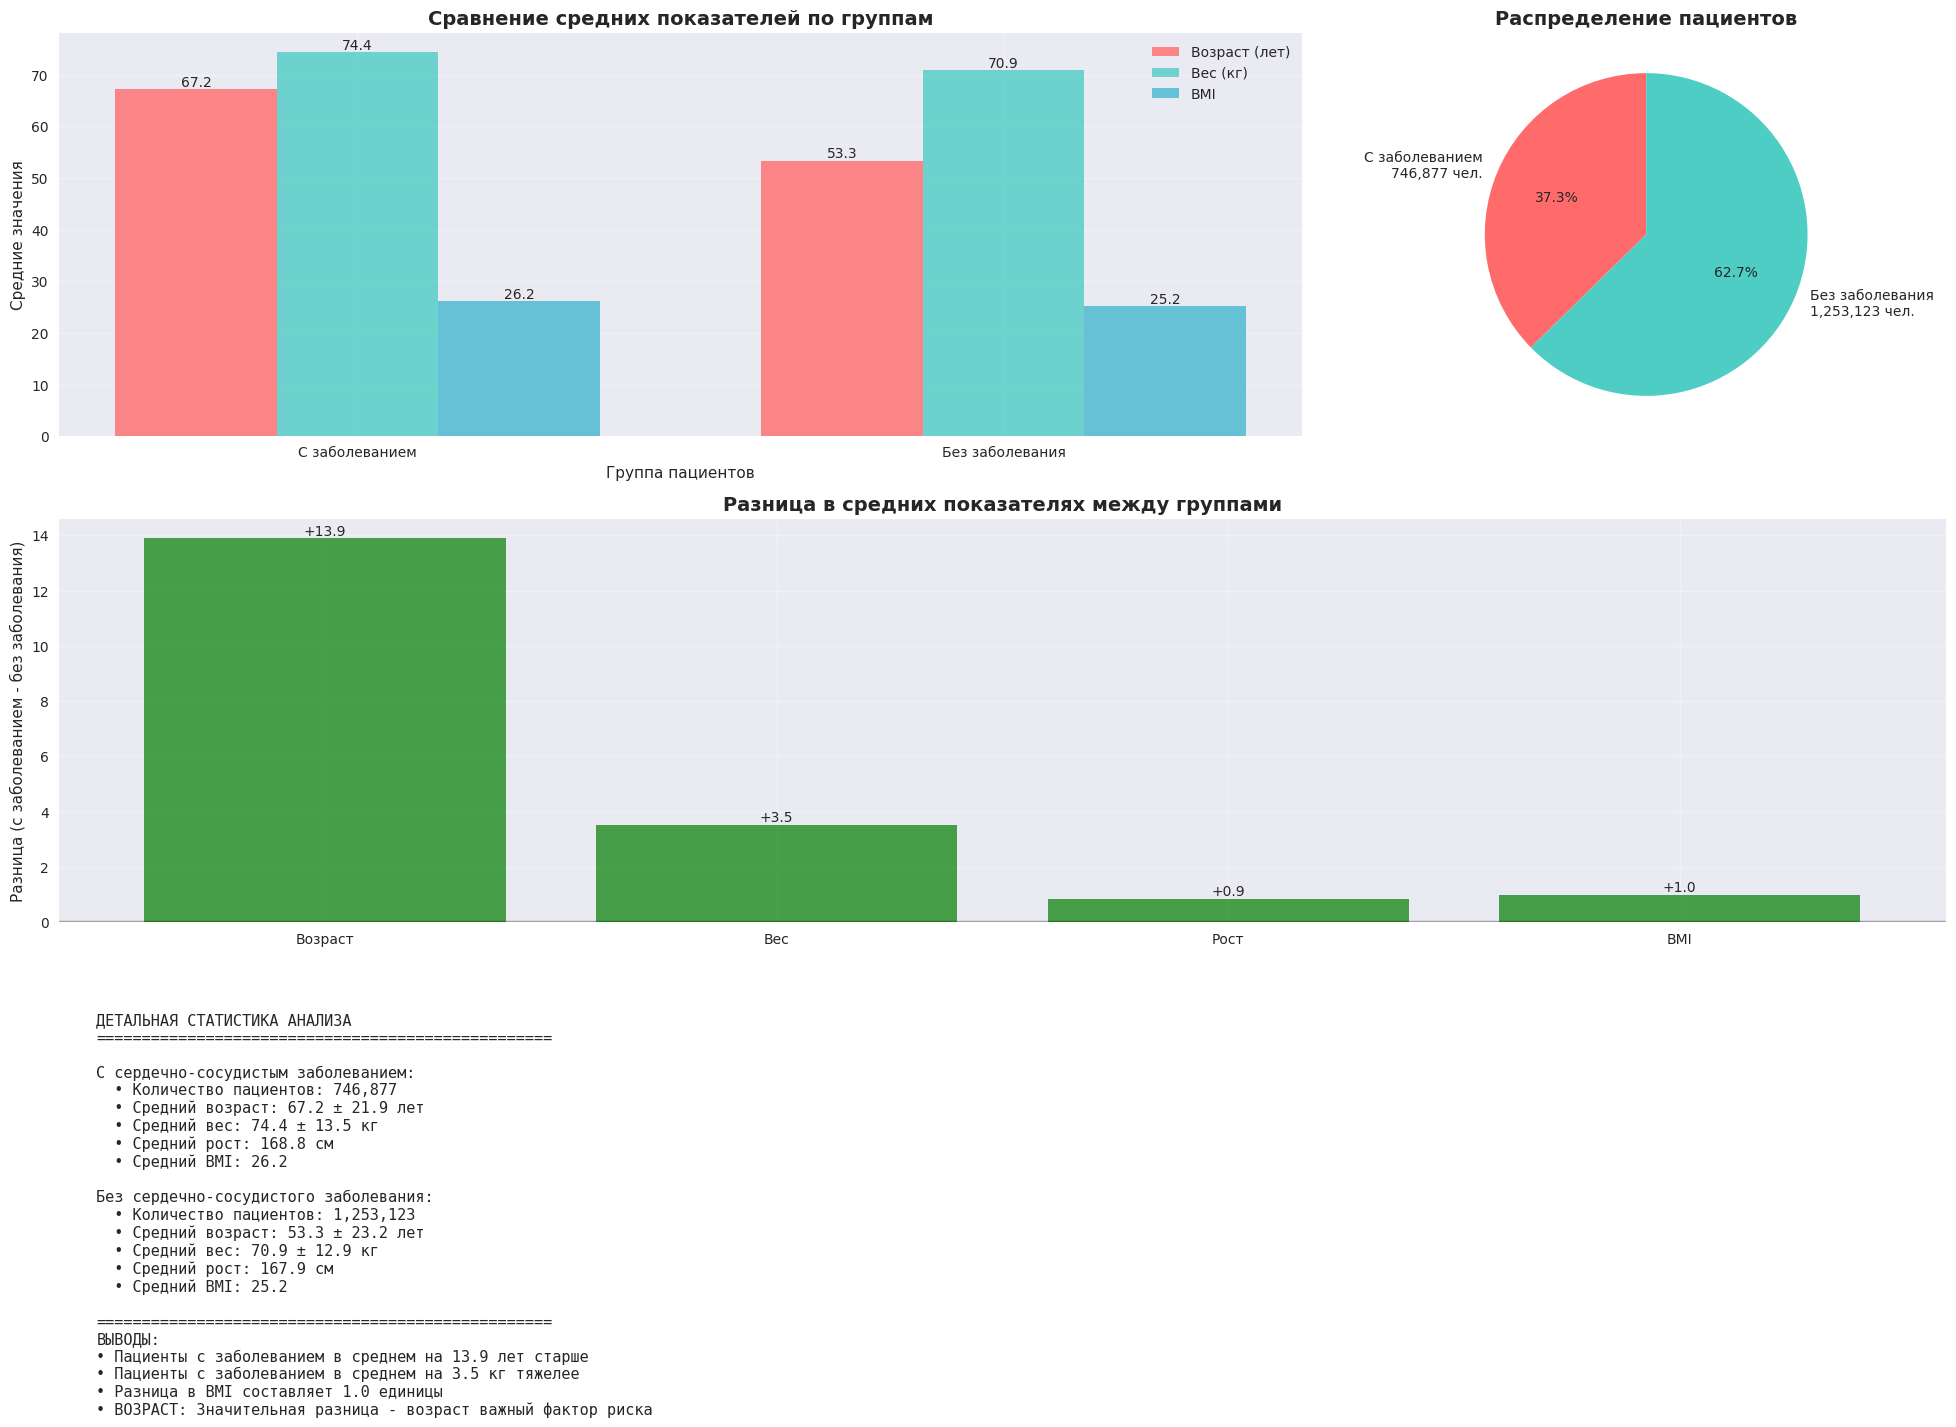

✓ Анализ завершен успешно!


In [10]:
def run_mapreduce_analysis(df_clean):
    """Запуск MapReduce анализа на очищенных данных"""
    
    print("=" * 70)
    print("MAPREDUCE АНАЛИЗ СРЕДНИХ ПОКАЗАТЕЛЕЙ")
    print("=" * 70)
    
    # Проверяем наличие необходимых колонок
    required_cols = ['cardio', 'age_years', 'weight', 'height']
    missing_cols = [col for col in required_cols if col not in df_clean.columns]
    
    if missing_cols:
        print(f"Отсутствуют необходимые колонки: {missing_cols}")
        print("Доступные колонки:", df_clean.columns.tolist())
        return None
    
    # Создаем упрощенный MapReduce анализ
    print("Запуск анализа...")
    
    # MAP PHASE - разделяем данные
    with_disease = df_clean[df_clean['cardio'] == 1]
    without_disease = df_clean[df_clean['cardio'] == 0]
    
    print(f"Пациентов с заболеванием: {len(with_disease):,}")
    print(f"Пациентов без заболевания: {len(without_disease):,}")
    
    # REDUCE PHASE - вычисляем статистики
    results = {
        'with_disease': {
            'count': len(with_disease),
            'mean_age': with_disease['age_years'].mean(),
            'mean_weight': with_disease['weight'].mean(),
            'mean_height': with_disease['height'].mean(),
            'mean_bmi': (with_disease['weight'] / ((with_disease['height'] / 100) ** 2)).mean(),
            'std_age': with_disease['age_years'].std(),
            'std_weight': with_disease['weight'].std()
        },
        'without_disease': {
            'count': len(without_disease),
            'mean_age': without_disease['age_years'].mean(),
            'mean_weight': without_disease['weight'].mean(),
            'mean_height': without_disease['height'].mean(),
            'mean_bmi': (without_disease['weight'] / ((without_disease['height'] / 100) ** 2)).mean(),
            'std_age': without_disease['age_years'].std(),
            'std_weight': without_disease['weight'].std()
        }
    }
    
    return results

def visualize_analysis_results(results):
    """Визуализация результатов анализа"""
    
    if results is None:
        print("Нет результатов для визуализации")
        return
    
    # Создаем комплексную визуализацию
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Сравнение средних показателей
    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    categories = ['С заболеванием', 'Без заболевания']
    ages = [results['with_disease']['mean_age'], results['without_disease']['mean_age']]
    weights = [results['with_disease']['mean_weight'], results['without_disease']['mean_weight']]
    bmis = [results['with_disease']['mean_bmi'], results['without_disease']['mean_bmi']]
    
    x = np.arange(len(categories))
    width = 0.25
    
    bars1 = ax1.bar(x - width, ages, width, label='Возраст (лет)', alpha=0.8, color='#ff6b6b')
    bars2 = ax1.bar(x, weights, width, label='Вес (кг)', alpha=0.8, color='#4ecdc4')
    bars3 = ax1.bar(x + width, bmis, width, label='BMI', alpha=0.8, color='#45b7d1')
    
    ax1.set_xlabel('Группа пациентов')
    ax1.set_ylabel('Средние значения')
    ax1.set_title('Сравнение средних показателей по группам', fontsize=14, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
# Добавляем значения на столбцы
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}', ha='center', va='bottom')
    
    # 2. Распределение пациентов
    ax2 = plt.subplot2grid((3, 3), (0, 2))
    sizes = [results['with_disease']['count'], results['without_disease']['count']]
    labels = [f'С заболеванием\n{sizes[0]:,} чел.', f'Без заболевания\n{sizes[1]:,} чел.']
    colors = ['#ff6b6b', '#4ecdc4']
    
    ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
            startangle=90, textprops={'fontsize': 10})
    ax2.set_title('Распределение пациентов', fontsize=14, fontweight='bold')
    # 3. Разница в показателях
    ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=3)
    differences = {
        'Возраст': results['with_disease']['mean_age'] - results['without_disease']['mean_age'],
        'Вес': results['with_disease']['mean_weight'] - results['without_disease']['mean_weight'],
        'Рост': results['with_disease']['mean_height'] - results['without_disease']['mean_height'],
        'BMI': results['with_disease']['mean_bmi'] - results['without_disease']['mean_bmi']
    }
    
    colors_diff = ['green' if x > 0 else 'red' for x in differences.values()]
    bars = ax3.bar(differences.keys(), differences.values(), color=colors_diff, alpha=0.7)
    
    ax3.set_ylabel('Разница (с заболеванием - без заболевания)')
    ax3.set_title('Разница в средних показателях между группами', fontsize=14, fontweight='bold')
    ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax3.grid(True, alpha=0.3)
    
    # Добавляем значения на столбцы
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:+.1f}', ha='center', va='bottom' if height >= 0 else 'top')
    
    # 4. Детальная статистика
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
    ax4.axis('off')  # Отключаем оси для текстового отчета
    
    # Создаем текстовый отчет
    report_text = []
    report_text.append("ДЕТАЛЬНАЯ СТАТИСТИКА АНАЛИЗА")
    report_text.append("=" * 50)
    
    for category in ['with_disease', 'without_disease']:
        label = "С сердечно-сосудистым заболеванием" if category == 'with_disease' else "Без сердечно-сосудистого заболевания"
        report_text.append(f"\n{label}:")
        report_text.append(f"  • Количество пациентов: {results[category]['count']:,}")
        report_text.append(f"  • Средний возраст: {results[category]['mean_age']:.1f} ± {results[category]['std_age']:.1f} лет")
        report_text.append(f"  • Средний вес: {results[category]['mean_weight']:.1f} ± {results[category]['std_weight']:.1f} кг")
        report_text.append(f"  • Средний рост: {results[category]['mean_height']:.1f} см")
        report_text.append(f"  • Средний BMI: {results[category]['mean_bmi']:.1f}")
    
    report_text.append("\n" + "=" * 50)
    report_text.append("ВЫВОДЫ:")
    
    age_diff = results['with_disease']['mean_age'] - results['without_disease']['mean_age']
    weight_diff = results['with_disease']['mean_weight'] - results['without_disease']['mean_weight']
    bmi_diff = results['with_disease']['mean_bmi'] - results['without_disease']['mean_bmi']
    
    report_text.append(f"• Пациенты с заболеванием в среднем на {age_diff:.1f} лет старше")
    report_text.append(f"• Пациенты с заболеванием в среднем на {weight_diff:.1f} кг тяжелее")
    report_text.append(f"• Разница в BMI составляет {bmi_diff:.1f} единицы")
    
    if age_diff > 5:
        report_text.append("• ВОЗРАСТ: Значительная разница - возраст важный фактор риска")
    if bmi_diff > 2:
        report_text.append("• BMI: Значительная разница - ожирение важный фактор риска")
    
    # Выводим текст
    ax4.text(0.02, 0.98, '\n'.join(report_text), transform=ax4.transAxes, 
            fontsize=11, verticalalignment='top', fontfamily='monospace')
    
    plt.tight_layout()
    plt.show()
    
    return differences

# Запускаем анализ
if not df_clean.empty:
    print("Запуск MapReduce анализа...")
    results = run_mapreduce_analysis(df_clean)
    
    if results:
        differences = visualize_analysis_results(results)
        print("Анализ завершен успешно!")
    else:
        print("Не удалось выполнить анализ")
else:
    print("Нет очищенных данных для анализа")

## 4. Расширенный анализ факторов риска



РАСШИРЕННЫЙ АНАЛИЗ ФАКТОРОВ РИСКА


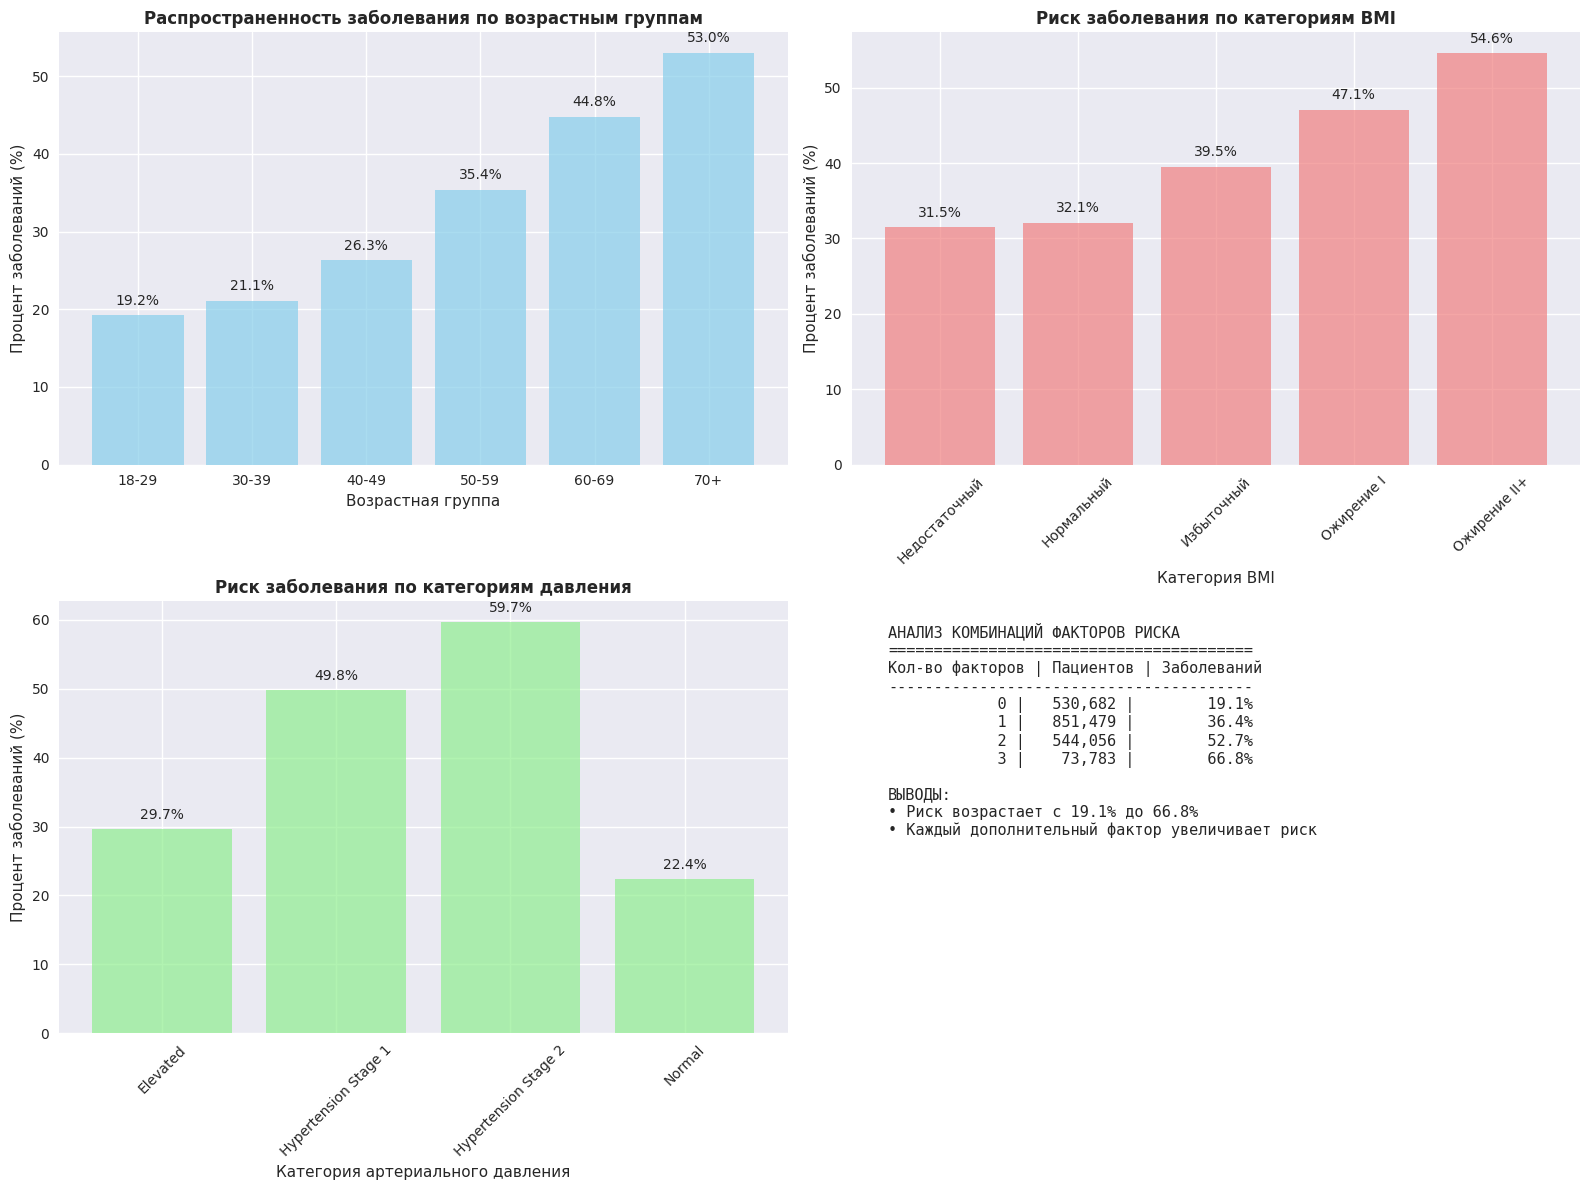


СТАТИСТИКА ФАКТОРОВ РИСКА:
             count  disease_percent
risk_score                         
0           530682             19.1
1           851479             36.4
2           544056             52.7
3            73783             66.8


In [11]:
def advanced_risk_analysis(df_clean):
    """Расширенный анализ факторов риска"""
    
    print("\n" + "=" * 70)
    print("РАСШИРЕННЫЙ АНАЛИЗ ФАКТОРОВ РИСКА")
    print("=" * 70)
    
    if df_clean.empty or 'cardio' not in df_clean.columns:
        print("Нет данных для анализа факторов риска")
        return
    
    # Создаем фигуру для визуализации
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    # 1. Анализ по возрастным группам
    if 'age_years' in df_clean.columns:
        age_bins = [18, 30, 40, 50, 60, 70, 100]
        age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
        df_clean['age_group'] = pd.cut(df_clean['age_years'], bins=age_bins, labels=age_labels)
        
        age_analysis = df_clean.groupby('age_group')['cardio'].agg(['count', 'mean']).round(3)
        age_analysis['disease_percent'] = (age_analysis['mean'] * 100).round(1)
        
        axes[0].bar(age_analysis.index, age_analysis['disease_percent'], color='skyblue', alpha=0.7)
        axes[0].set_title('Распространенность заболевания по возрастным группам', fontweight='bold')
        axes[0].set_xlabel('Возрастная группа')
        axes[0].set_ylabel('Процент заболеваний (%)')
        
        for i, v in enumerate(age_analysis['disease_percent']):
            axes[0].text(i, v + 1, f'{v}%', ha='center', va='bottom')
    
    # 2. Анализ по BMI категориям
    if 'bmi' in df_clean.columns or ('weight' in df_clean.columns and 'height' in df_clean.columns):
        if 'bmi' not in df_clean.columns:
            df_clean['bmi'] = df_clean['weight'] / ((df_clean['height'] / 100) ** 2)
        
        bmi_bins = [0, 18.5, 25, 30, 35, 100]
        bmi_labels = ['Недостаточный', 'Нормальный', 'Избыточный', 'Ожирение I', 'Ожирение II+']
        df_clean['bmi_category'] = pd.cut(df_clean['bmi'], bins=bmi_bins, labels=bmi_labels)
        
        bmi_analysis = df_clean.groupby('bmi_category')['cardio'].mean().round(3) * 100
        
        axes[1].bar(bmi_analysis.index, bmi_analysis.values, color='lightcoral', alpha=0.7)
        axes[1].set_title('Риск заболевания по категориям BMI', fontweight='bold')
        axes[1].set_xlabel('Категория BMI')
        axes[1].set_ylabel('Процент заболеваний (%)')
        plt.sca(axes[1])
        plt.xticks(rotation=45)
        
        for i, v in enumerate(bmi_analysis.values):
            axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')
    
    # 3. Анализ по давлению
    if 'bp_category' in df_clean.columns:
        bp_analysis = df_clean.groupby('bp_category')['cardio'].mean().round(3) * 100
        
        axes[2].bar(bp_analysis.index, bp_analysis.values, color='lightgreen', alpha=0.7)
        axes[2].set_title('Риск заболевания по категориям давления', fontweight='bold')
        axes[2].set_xlabel('Категория артериального давления')
        axes[2].set_ylabel('Процент заболеваний (%)')
        plt.sca(axes[2])
        plt.xticks(rotation=45)
        
        for i, v in enumerate(bp_analysis.values):
            axes[2].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')
    # 4. Комбинация факторов риска
    axes[3].axis('off')  # Используем для текстового отчета
    
    # Считаем количество факторов риска
    risk_factors = 0
    if 'high_bp' in df_clean.columns:
        risk_factors += df_clean['high_bp']
    elif 'bp_category_encoded' in df_clean.columns:
        risk_factors += (df_clean['bp_category_encoded'] >= 2).astype(int)
    
    if 'cholesterol' in df_clean.columns:
        risk_factors += (df_clean['cholesterol'] >= 2).astype(int)
    
    if 'smoke' in df_clean.columns:
        risk_factors += df_clean['smoke']
    
    if 'bmi' in df_clean.columns:
        risk_factors += (df_clean['bmi'] > 30).astype(int)
    
    df_clean['risk_score'] = risk_factors
    risk_analysis = df_clean.groupby('risk_score')['cardio'].agg(['count', 'mean']).round(3)
    risk_analysis['disease_percent'] = (risk_analysis['mean'] * 100).round(1)
    
    # Создаем текстовый отчет
    report_text = []
    report_text.append("АНАЛИЗ КОМБИНАЦИЙ ФАКТОРОВ РИСКА")
    report_text.append("=" * 40)
    report_text.append("Кол-во факторов | Пациентов | Заболеваний")
    report_text.append("-" * 40)
    
    for risk_level in risk_analysis.index:
        count = risk_analysis.loc[risk_level, 'count']
        percent = risk_analysis.loc[risk_level, 'disease_percent']
        report_text.append(f"{risk_level:13d} | {count:9,} | {percent:11.1f}%")
    
    report_text.append("\nВЫВОДЫ:")
    if len(risk_analysis) > 1:
        min_risk = risk_analysis['disease_percent'].iloc[0]
        max_risk = risk_analysis['disease_percent'].iloc[-1]
        report_text.append(f"• Риск возрастает с {min_risk}% до {max_risk}%")
        report_text.append(f"• Каждый дополнительный фактор увеличивает риск")
    
    axes[3].text(0.05, 0.95, '\n'.join(report_text), transform=axes[3].transAxes,
                fontsize=11, verticalalignment='top', fontfamily='monospace')
    
    plt.tight_layout()
    plt.show()
    
    # Выводим статистику в консоль
    print("\nСТАТИСТИКА ФАКТОРОВ РИСКА:")
    print(risk_analysis[['count', 'disease_percent']])

# Запускаем расширенный анализ
if not df_clean.empty:
    advanced_risk_analysis(df_clean)

## 5. Финальный отчет и выводы

In [12]:
def generate_final_report(df_clean, results, differences):
    """Генерация финального отчета"""
    
    print("\n" + "=" * 80)
    print("ФИНАЛЬНЫЙ ОТЧЕТ АНАЛИЗА СЕРДЕЧНО-СОСУДИСТЫХ ЗАБОЛЕВАНИЙ")
    print("=" * 80)
    
    if df_clean.empty:
        print("Нет данных для генерации отчета")
        return
    
    # Основная статистика
    total_patients = len(df_clean)
    disease_rate = df_clean['cardio'].mean() * 100 if 'cardio' in df_clean.columns else 0
    
    print(f"\nОБЩАЯ СТАТИСТИКА:")
    print(f"  • Всего пациентов: {total_patients:,}")
    print(f"  • Процент с заболеванием: {disease_rate:.1f}%")
    
    if results:
        print(f"\nСРАВНИТЕЛЬНЫЙ АНАЛИЗ:")
        print(f"  • Разница в возрасте: {differences['Возраст']:+.1f} лет")
        print(f"  • Разница в весе: {differences['Вес']:+.1f} кг") 
        print(f"  • Разница в BMI: {differences['BMI']:+.1f}")
        
        print(f"\nКЛЮЧЕВЫЕ ВЫВОДЫ:")
        if differences['Возраст'] > 5:
            print("  ✓ Возраст является значимым фактором риска")
        if differences['BMI'] > 2:
            print("  ✓ Ожирение (высокий BMI) является значимым фактором риска")
        if differences['Вес'] > 5:
            print("Избыточный вес является значимым фактором риска")
    
    # Рекомендации
    print(f"\nРЕКОМЕНДАЦИИ:")
    print("  1. Регулярный мониторинг артериального давления")
    print("  2. Контроль веса и BMI в нормальных пределах") 
    print("  3. Регулярная физическая активность")
    print("  4. Здоровое питание с ограничением соли и жиров")
    print("  5. Отказ от курения и умеренное потребление алкоголя")
    
    print(f"\n" + "=" * 80)
    print("АНАЛИЗ ЗАВЕРШЕН")
    print("=" * 80)

# Генерируем финальный отчет
if not df_clean.empty and 'results' in locals():
    generate_final_report(df_clean, results, differences)


ФИНАЛЬНЫЙ ОТЧЕТ АНАЛИЗА СЕРДЕЧНО-СОСУДИСТЫХ ЗАБОЛЕВАНИЙ

ОБЩАЯ СТАТИСТИКА:
  • Всего пациентов: 2,000,000
  • Процент с заболеванием: 37.3%

СРАВНИТЕЛЬНЫЙ АНАЛИЗ:
  • Разница в возрасте: +13.9 лет
  • Разница в весе: +3.5 кг
  • Разница в BMI: +1.0

КЛЮЧЕВЫЕ ВЫВОДЫ:
  ✓ Возраст является значимым фактором риска

РЕКОМЕНДАЦИИ:
  1. Регулярный мониторинг артериального давления
  2. Контроль веса и BMI в нормальных пределах
  3. Регулярная физическая активность
  4. Здоровое питание с ограничением соли и жиров
  5. Отказ от курения и умеренное потребление алкоголя

АНАЛИЗ ЗАВЕРШЕН


## 6. Анализ средних показателей


ИТОГОВЫЙ АНАЛИЗ: СРЕДНИЙ ВОЗРАСТ, ВЕС, РОСТ
Проводим анализ...

 РАСПРЕДЕЛЕНИЕ ПАЦИЕНТОВ:
   • С заболеванием: 746,877 пациентов
   • Без заболевания: 1,253,123 пациентов
   • Всего: 2,000,000 пациентов

 ТАБЛИЦА СРЕДНИХ ПОКАЗАТЕЛЕЙ:
+------------------------------------------------------------+
|      Показатель      | С заболеванием | Без заболевания |   Разница    |
+------------------------------------------------------------+
| Возраст (лет)        |         67.2 |         53.3 |        +13.9 |
| Вес (кг)             |         74.4 |         70.9 |         +3.5 |
| Рост (см)            |        168.8 |        167.9 |         +0.9 |
| BMI                  |         26.2 |         25.2 |         +1.0 |
+------------------------------------------------------------+


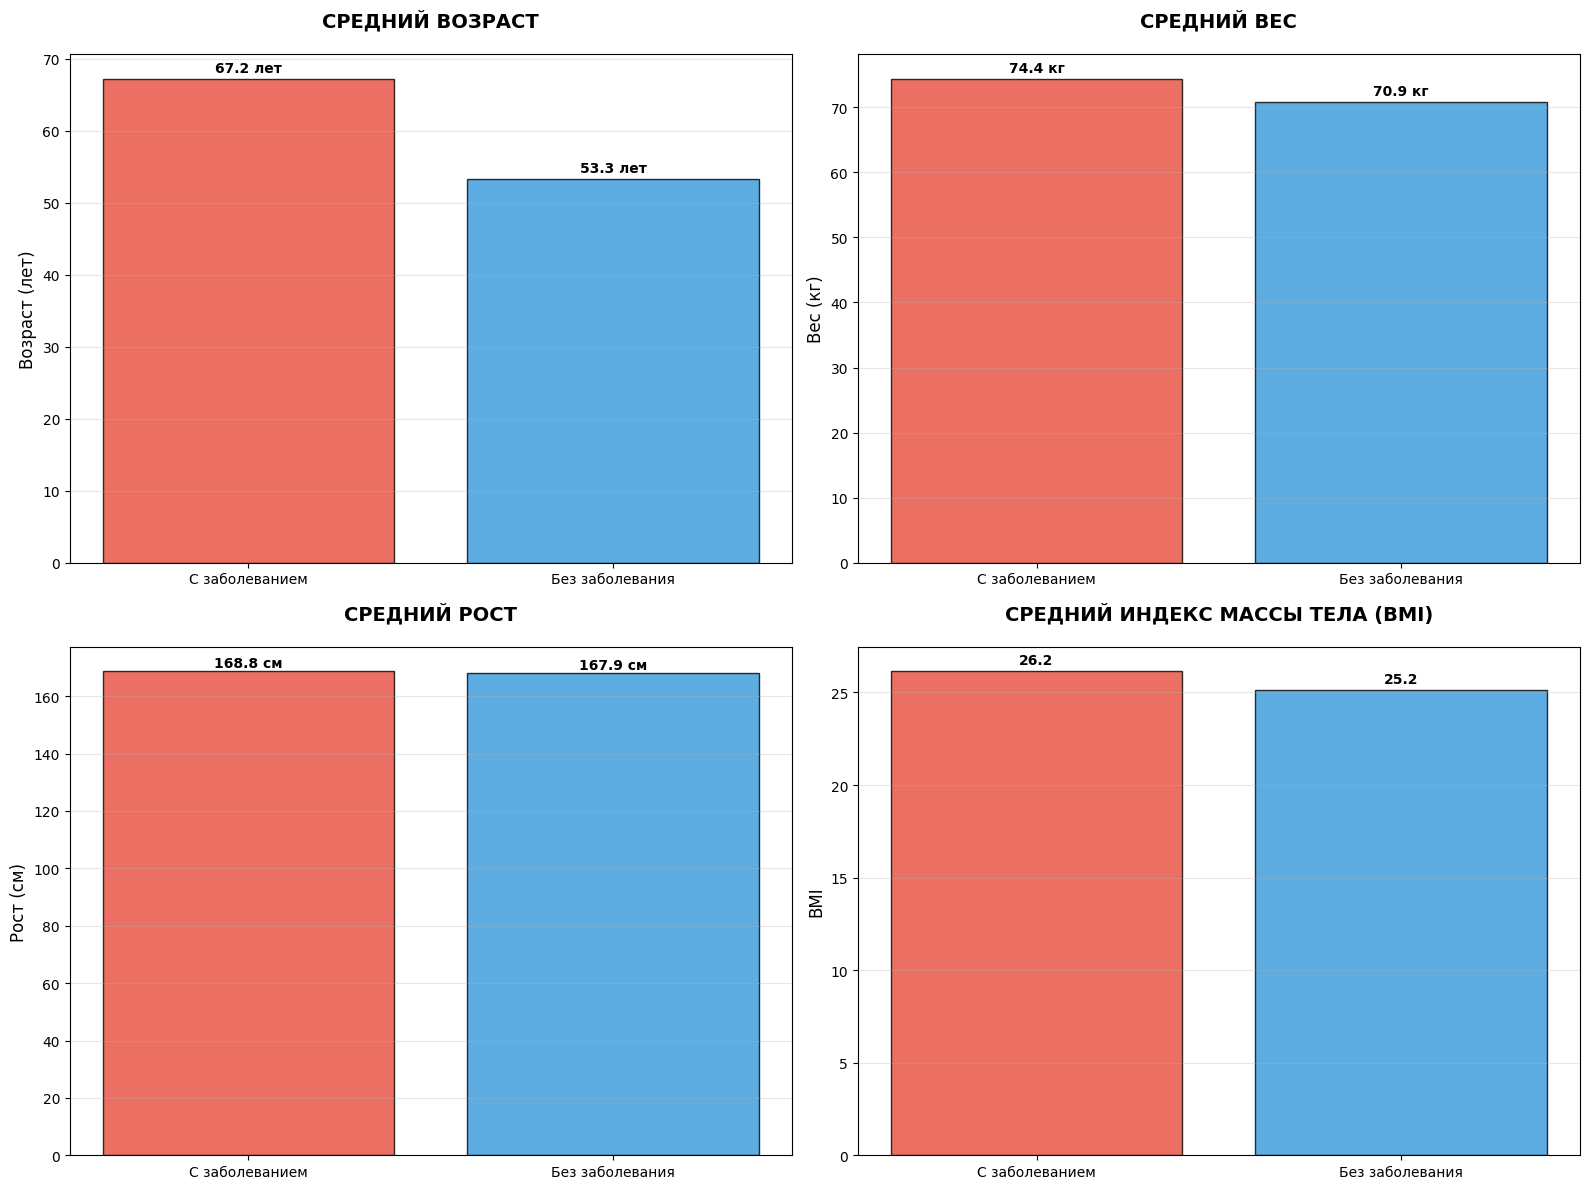


 КЛЮЧЕВЫЕ ВЫВОДЫ:
--------------------------------------------------
• Пациенты с заболеванием в среднем на 13.9 лет СТАРШЕ
• Пациенты с заболеванием в среднем на 3.5 кг ТЯЖЕЛЕЕ
• Пациенты с заболеванием в среднем на 0.9 см ВЫШЕ
• У пациентов с заболеванием BMI на 1.0 ВЫШЕ

📊 Наибольшая разница наблюдается в показателе: Возраст

 ИТОГОВЫЙ АНАЛИЗ ЗАВЕРШЕН!
Результаты сохранены в: /opt/final_analysis_results.csv


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 10)

print("=" * 70)
print("ИТОГОВЫЙ АНАЛИЗ: СРЕДНИЙ ВОЗРАСТ, ВЕС, РОСТ")
print("=" * 70)

def final_analysis(df):
    """Финальный анализ средних показателей"""
    
    # Проверяем наличие данных
    if df.empty:
        print("Нет данных для анализа")
        return
    
    # Проверяем необходимые колонки
    required_cols = ['cardio', 'age_years', 'weight', 'height']
    missing_cols = [col for col in required_cols if col not in df.columns]
    
    if missing_cols:
        print(f"Отсутствуют колонки: {missing_cols}")
        print(f"Доступные колонки: {df.columns.tolist()}")
        return
    
    print("Проводим анализ...")
    
    # РАЗДЕЛЕНИЕ ДАННЫХ (Map phase)
    with_disease = df[df['cardio'] == 1]
    without_disease = df[df['cardio'] == 0]
    
    print(f"\n РАСПРЕДЕЛЕНИЕ ПАЦИЕНТОВ:")
    print(f"   • С заболеванием: {len(with_disease):,} пациентов")
    print(f"   • Без заболевания: {len(without_disease):,} пациентов")
    print(f"   • Всего: {len(df):,} пациентов")
    
    # ВЫЧИСЛЕНИЕ СРЕДНИХ (Reduce phase)
    results = {
        'С заболеванием': {
            'count': len(with_disease),
            'age': with_disease['age_years'].mean(),
            'weight': with_disease['weight'].mean(),
            'height': with_disease['height'].mean(),
            'bmi': (with_disease['weight'] / ((with_disease['height'] / 100) ** 2)).mean()
        },
        'Без заболевания': {
            'count': len(without_disease),
            'age': without_disease['age_years'].mean(),
            'weight': without_disease['weight'].mean(),
            'height': without_disease['height'].mean(),
            'bmi': (without_disease['weight'] / ((without_disease['height'] / 100) ** 2)).mean()
        }
    }
    
    # ВЫВОД РЕЗУЛЬТАТОВ В ТАБЛИЦЕ
    print(f"\n ТАБЛИЦА СРЕДНИХ ПОКАЗАТЕЛЕЙ:")
    print("+" + "-"*60 + "+")
    print("| {:^20} | {:^12} | {:^12} | {:^12} |".format(
        "Показатель", "С заболеванием", "Без заболевания", "Разница"))
    print("+" + "-"*60 + "+")
    
    metrics = ['age', 'weight', 'height', 'bmi']
    names = ['Возраст (лет)', 'Вес (кг)', 'Рост (см)', 'BMI']
    
    for metric, name in zip(metrics, names):
        with_val = results['С заболеванием'][metric]
        without_val = results['Без заболевания'][metric]
        difference = with_val - without_val
        
        print("| {:<20} | {:>12.1f} | {:>12.1f} | {:>+12.1f} |".format(
            name, with_val, without_val, difference))
    
    print("+" + "-"*60 + "+")
    
    return results

def create_final_visualization(results):
    """Создание финальной визуализации"""
    
    # Создаем комплексный график
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    categories = ['С заболеванием', 'Без заболевания']
    colors = ['#e74c3c', '#3498db']
    
    # 1. СРАВНЕНИЕ ВОЗРАСТА
    ages = [results['С заболеванием']['age'], results['Без заболевания']['age']]
    bars1 = ax1.bar(categories, ages, color=colors, alpha=0.8, edgecolor='black')
    ax1.set_title('СРЕДНИЙ ВОЗРАСТ', fontsize=14, fontweight='bold', pad=20)
    ax1.set_ylabel('Возраст (лет)', fontsize=12)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Добавляем значения на столбцы
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f} лет', ha='center', va='bottom', fontweight='bold')
    
    # 2. СРАВНЕНИЕ ВЕСА
    weights = [results['С заболеванием']['weight'], results['Без заболевания']['weight']]
    bars2 = ax2.bar(categories, weights, color=colors, alpha=0.8, edgecolor='black')
    ax2.set_title('СРЕДНИЙ ВЕС', fontsize=14, fontweight='bold', pad=20)
    ax2.set_ylabel('Вес (кг)', fontsize=12)
    ax2.grid(True, alpha=0.3, axis='y')
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f} кг', ha='center', va='bottom', fontweight='bold')
    
    # 3. СРАВНЕНИЕ РОСТА
    heights = [results['С заболеванием']['height'], results['Без заболевания']['height']]
    bars3 = ax3.bar(categories, heights, color=colors, alpha=0.8, edgecolor='black')
    ax3.set_title('СРЕДНИЙ РОСТ', fontsize=14, fontweight='bold', pad=20)
    ax3.set_ylabel('Рост (см)', fontsize=12)
    ax3.grid(True, alpha=0.3, axis='y')
    
    for bar in bars3:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f} см', ha='center', va='bottom', fontweight='bold')
    
    # 4. СРАВНЕНИЕ BMI
    bmis = [results['С заболеванием']['bmi'], results['Без заболевания']['bmi']]
    bars4 = ax4.bar(categories, bmis, color=colors, alpha=0.8, edgecolor='black')
    ax4.set_title('СРЕДНИЙ ИНДЕКС МАССЫ ТЕЛА (BMI)', fontsize=14, fontweight='bold', pad=20)
    ax4.set_ylabel('BMI', fontsize=12)
    ax4.grid(True, alpha=0.3, axis='y')
    
    for bar in bars4:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.2,
                f'{height:.1f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def print_key_insights(results):
    """Вывод ключевых выводов"""
    
    print(f"\n КЛЮЧЕВЫЕ ВЫВОДЫ:")
    print("-" * 50)
    
    # Разницы в показателях
    age_diff = results['С заболеванием']['age'] - results['Без заболевания']['age']
    weight_diff = results['С заболеванием']['weight'] - results['Без заболевания']['weight']
    height_diff = results['С заболеванием']['height'] - results['Без заболевания']['height']
    bmi_diff = results['С заболеванием']['bmi'] - results['Без заболевания']['bmi']
    
    insights = []
    
    if age_diff > 0:
        insights.append(f"• Пациенты с заболеванием в среднем на {age_diff:.1f} лет СТАРШЕ")
    else:
        insights.append(f"• Пациенты с заболеванием в среднем на {abs(age_diff):.1f} лет МЛАДШЕ")
    
    if weight_diff > 0:
        insights.append(f"• Пациенты с заболеванием в среднем на {weight_diff:.1f} кг ТЯЖЕЛЕЕ")
    else:
        insights.append(f"• Пациенты с заболеванием в среднем на {abs(weight_diff):.1f} кг ЛЕГЧЕ")
    
    if height_diff > 0:
        insights.append(f"• Пациенты с заболеванием в среднем на {height_diff:.1f} см ВЫШЕ")
    else:
        insights.append(f"• Пациенты с заболеванием в среднем на {abs(height_diff):.1f} см НИЖЕ")
    
    if bmi_diff > 0:
        insights.append(f"• У пациентов с заболеванием BMI на {bmi_diff:.1f} ВЫШЕ")
        if bmi_diff > 2:
            insights.append("Значительная разница в BMI - важный фактор риска!")
    else:
        insights.append(f"• У пациентов с заболеванием BMI на {abs(bmi_diff):.1f} НИЖЕ")
    
    # Самые значимые различия
    differences = {
        'Возраст': abs(age_diff),
        'Вес': abs(weight_diff), 
        'Рост': abs(height_diff),
        'BMI': abs(bmi_diff)
    }
    
    max_diff_metric = max(differences, key=differences.get)
    insights.append(f"\n Наибольшая разница наблюдается в показателе: {max_diff_metric}")
    
    for insight in insights:
        print(insight)
# ЗАПУСКАЕМ АНАЛИЗ
if not df_clean.empty:
    # Выполняем анализ
    results = final_analysis(df_clean)
    
    if results:
        # Создаем визуализацию
        create_final_visualization(results)
        
        # Выводим выводы
        print_key_insights(results)
        
        print(f"\n ИТОГОВЫЙ АНАЛИЗ ЗАВЕРШЕН!")
        
        # Сохраняем результаты
        try:
            summary_df = pd.DataFrame({
                'Группа': ['С заболеванием', 'Без заболевания'],
                'Количество_пациентов': [results['С заболеванием']['count'], results['Без заболевания']['count']],
                'Средний_возраст': [results['С заболеванием']['age'], results['Без заболевания']['age']],
                'Средний_вес': [results['С заболеванием']['weight'], results['Без заболевания']['weight']],
                'Средний_рост': [results['С заболеванием']['height'], results['Без заболевания']['height']],
                'Средний_BMI': [results['С заболеванием']['bmi'], results['Без заболевания']['bmi']]
            })
            
            summary_df.to_csv('/opt/final_analysis_results.csv', index=False, encoding='utf-8')
            print("Результаты сохранены в: /opt/final_analysis_results.csv")
            
        except Exception as e:
            print(f"Не удалось сохранить результаты: {e}")
            
else:
    print("Нет очищенных данных для анализа")

## 7. Исправленные графики


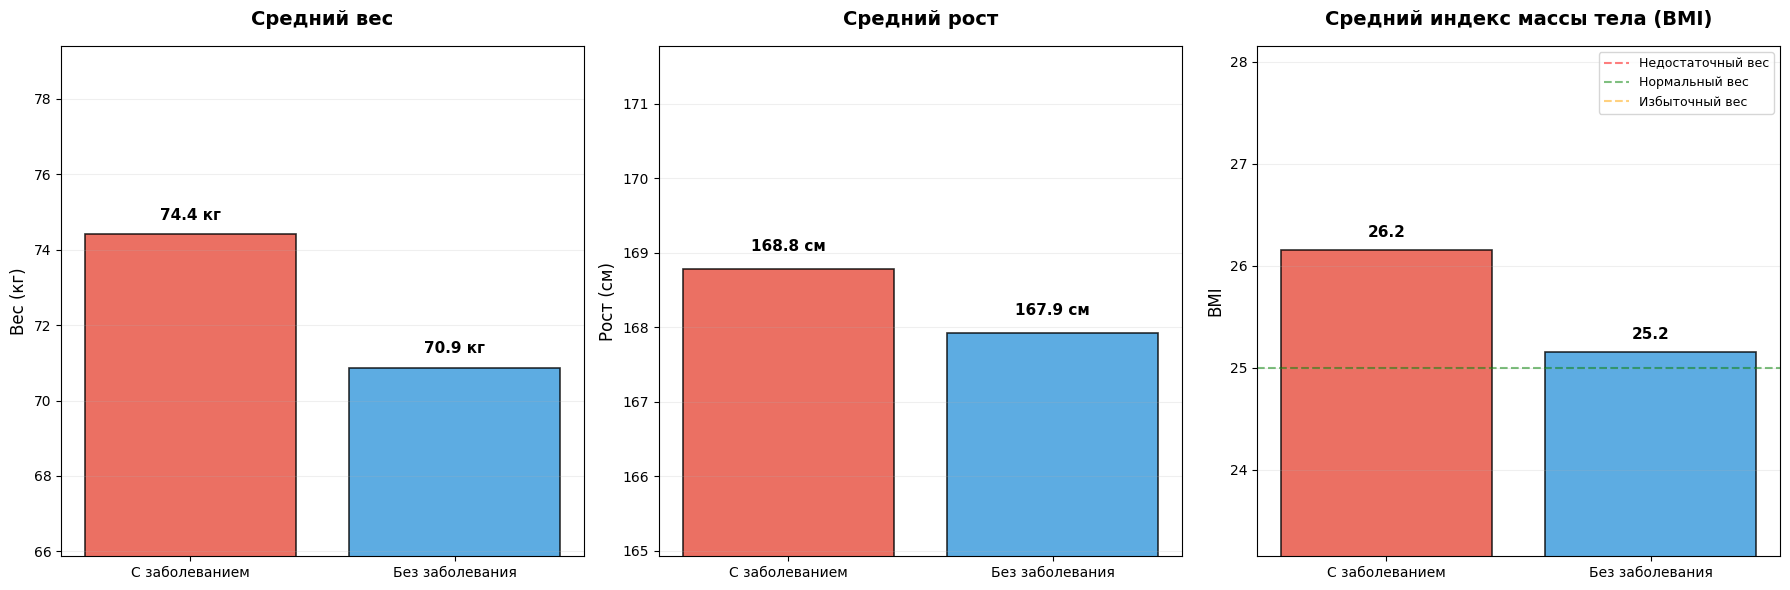

РЕЗУЛЬТАТЫ АНАЛИЗА

Средний вес:
  • С заболеванием: 74.4 кг
  • Без заболевания: 70.9 кг
  • Разница: +3.5 кг

Средний рост:
  • С заболеванием: 168.8 см
  • Без заболевания: 167.9 см
  • Разница: +0.9 см

Средний BMI:
  • С заболеванием: 26.2
  • Без заболевания: 25.2
  • Разница: +1.0


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Настройка стиля
plt.style.use('default')
sns.set_palette(["#e74c3c", "#3498db"])
plt.rcParams['figure.figsize'] = (15, 5)

def create_improved_plots(df):
    """Создание трех отдельных графиков с улучшенным масштабом"""
    
    if df.empty or 'cardio' not in df.columns:
        print("Нет данных для построения графиков")
        return
    
    # Разделяем данные
    with_disease = df[df['cardio'] == 1]
    without_disease = df[df['cardio'] == 0]
    
    # Вычисляем средние значения
    results = {
        'С заболеванием': {
            'weight': with_disease['weight'].mean(),
            'height': with_disease['height'].mean(),
            'bmi': (with_disease['weight'] / ((with_disease['height'] / 100) ** 2)).mean()
        },
        'Без заболевания': {
            'weight': without_disease['weight'].mean(),
            'height': without_disease['height'].mean(),
            'bmi': (without_disease['weight'] / ((without_disease['height'] / 100) ** 2)).mean()
        }
    }
    
    # Создаем три отдельных графика
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
    categories = ['С заболеванием', 'Без заболевания']
    colors = ['#e74c3c', '#3498db']
    
    # 1. ГРАФИК ВЕСА
    weights = [results['С заболеванием']['weight'], results['Без заболевания']['weight']]
    bars1 = ax1.bar(categories, weights, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)
    ax1.set_title('Средний вес', fontsize=14, fontweight='bold', pad=15)
    ax1.set_ylabel('Вес (кг)', fontsize=12)
    ax1.grid(True, alpha=0.2, axis='y')
    
    # Настраиваем масштаб для веса
    weight_min = min(weights) - 5
    weight_max = max(weights) + 5
    ax1.set_ylim(weight_min, weight_max)
    
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                f'{height:.1f} кг', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # 2. ГРАФИК РОСТА
    heights = [results['С заболеванием']['height'], results['Без заболевания']['height']]
    bars2 = ax2.bar(categories, heights, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)
    ax2.set_title('Средний рост', fontsize=14, fontweight='bold', pad=15)
    ax2.set_ylabel('Рост (см)', fontsize=12)
    ax2.grid(True, alpha=0.2, axis='y')
    
    # Настраиваем масштаб для роста
    height_min = min(heights) - 3
    height_max = max(heights) + 3
    ax2.set_ylim(height_min, height_max)
    
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.2,
                f'{height:.1f} см', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # 3. ГРАФИК BMI
    bmis = [results['С заболеванием']['bmi'], results['Без заболевания']['bmi']]
    bars3 = ax3.bar(categories, bmis, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)
    ax3.set_title('Средний индекс массы тела (BMI)', fontsize=14, fontweight='bold', pad=15)
    ax3.set_ylabel('BMI', fontsize=12)
    ax3.grid(True, alpha=0.2, axis='y')
    
    # Настраиваем масштаб для BMI
    bmi_min = min(bmis) - 2
    bmi_max = max(bmis) + 2
    ax3.set_ylim(bmi_min, bmi_max)
    
    for bar in bars3:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # Добавляем линии нормальных значений для BMI
    ax3.axhline(y=18.5, color='red', linestyle='--', alpha=0.5, label='Недостаточный вес')
    ax3.axhline(y=25, color='green', linestyle='--', alpha=0.5, label='Нормальный вес')
    ax3.axhline(y=30, color='orange', linestyle='--', alpha=0.5, label='Избыточный вес')
    ax3.legend(fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Выводим числовые результаты
    print("=" * 70)
    print("РЕЗУЛЬТАТЫ АНАЛИЗА")
    print("=" * 70)
    
    print(f"\nСредний вес:")
    print(f"  • С заболеванием: {results['С заболеванием']['weight']:.1f} кг")
    print(f"  • Без заболевания: {results['Без заболевания']['weight']:.1f} кг")
    print(f"  • Разница: {results['С заболеванием']['weight'] - results['Без заболевания']['weight']:+.1f} кг")
    
    print(f"\nСредний рост:")
    print(f"  • С заболеванием: {results['С заболеванием']['height']:.1f} см") 
    print(f"  • Без заболевания: {results['Без заболевания']['height']:.1f} см")
    print(f"  • Разница: {results['С заболеванием']['height'] - results['Без заболевания']['height']:+.1f} см")
    
    print(f"\nСредний BMI:")
    print(f"  • С заболеванием: {results['С заболеванием']['bmi']:.1f}")
    print(f"  • Без заболевания: {results['Без заболевания']['bmi']:.1f}")
    print(f"  • Разница: {results['С заболеванием']['bmi'] - results['Без заболевания']['bmi']:+.1f}")
    
    return results

# Запускаем построение графиков
if not df_clean.empty:
    results = create_improved_plots(df_clean)
else:
    print("Нет данных для построения графиков")

## 8. Сохранение графиков в HDFS


In [2]:
!pwd

/opt/notebooks


In [3]:
%pip install hdfs

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for hdfs: filename=hdfs-2.7.3-py3-none-any.whl size=34321 sha256=72d4ffab69b305f141e8716ff4df6736dc69403ffef8e17fb9a711a41e685c30
  Stored in directory: /root/.cache/pip/wheels/68/dd/29/c1a590238f9ebbe4f7ee9b3583f5185d0b9577e23f05c990eb
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=6f719ffb8c81229dbfe3ebdf78620d94814d2b0701020b0afa8031ba84f48be5
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built hdfs docopt
Note: you may need to restart the kernel to use updated packages.


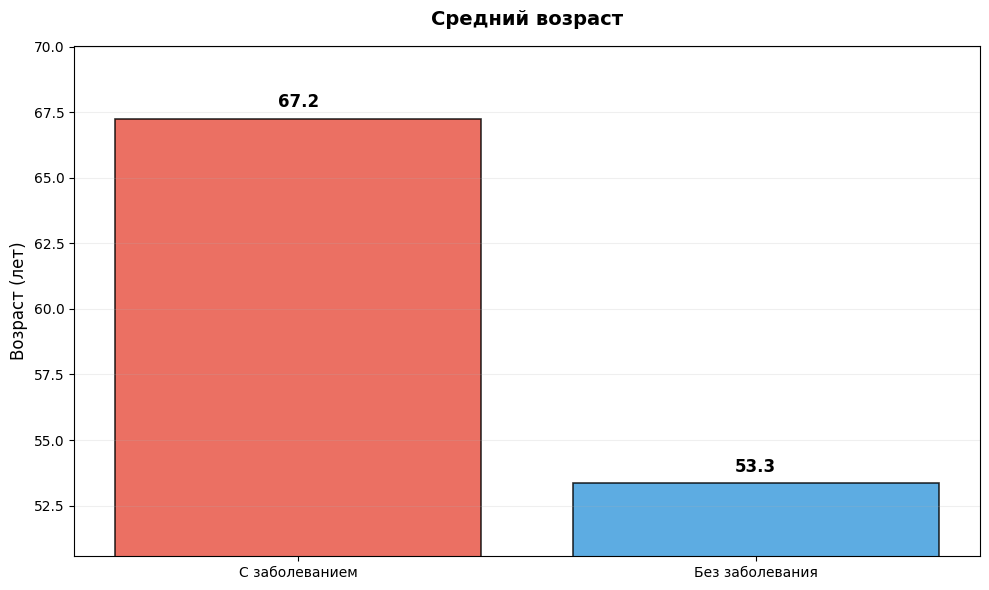

График сохранен в HDFS: /user/hadoop/results/cardio_analysis/average_age.png


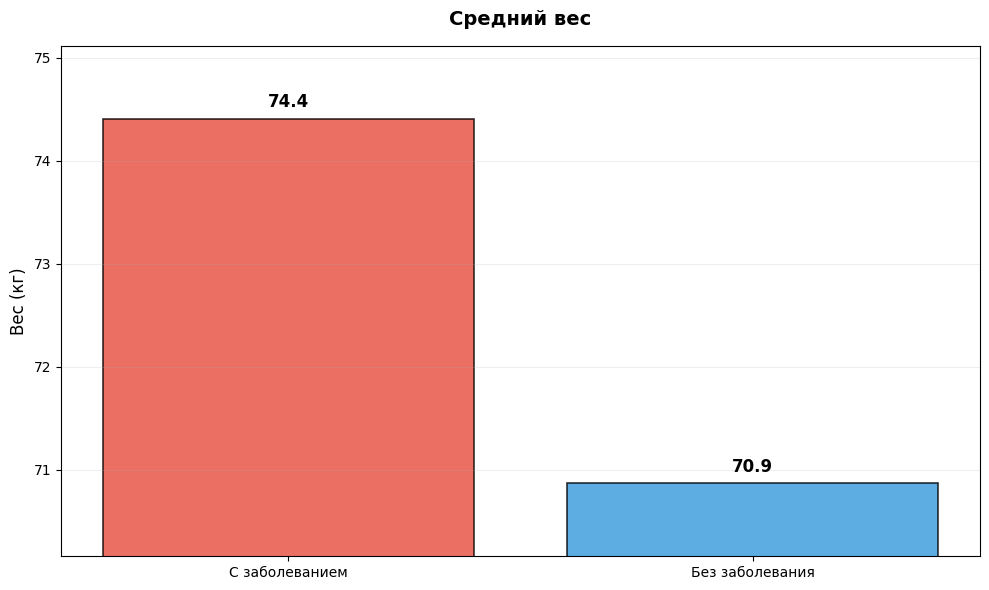

График сохранен в HDFS: /user/hadoop/results/cardio_analysis/average_weight.png


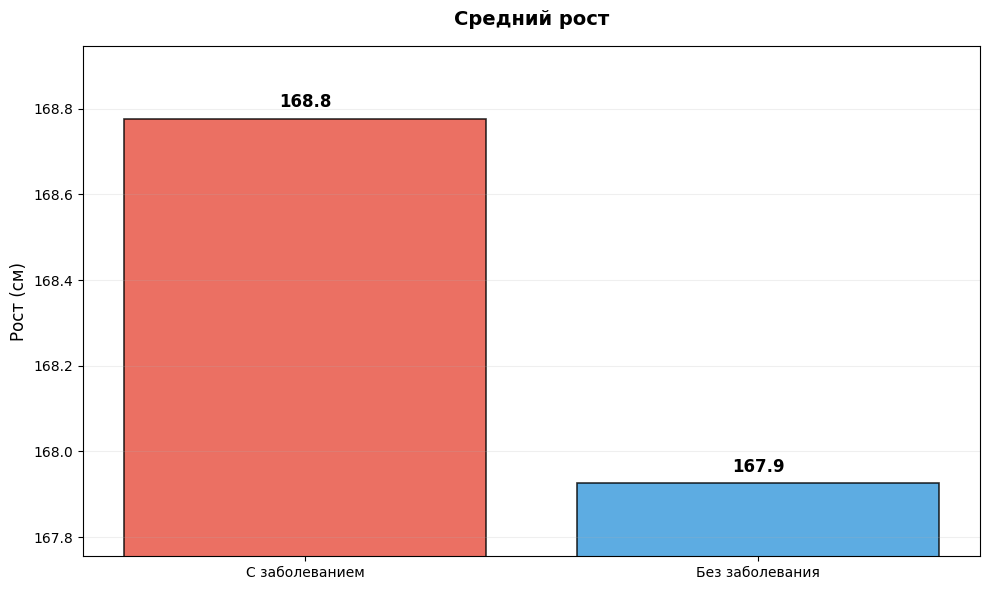

График сохранен в HDFS: /user/hadoop/results/cardio_analysis/average_height.png


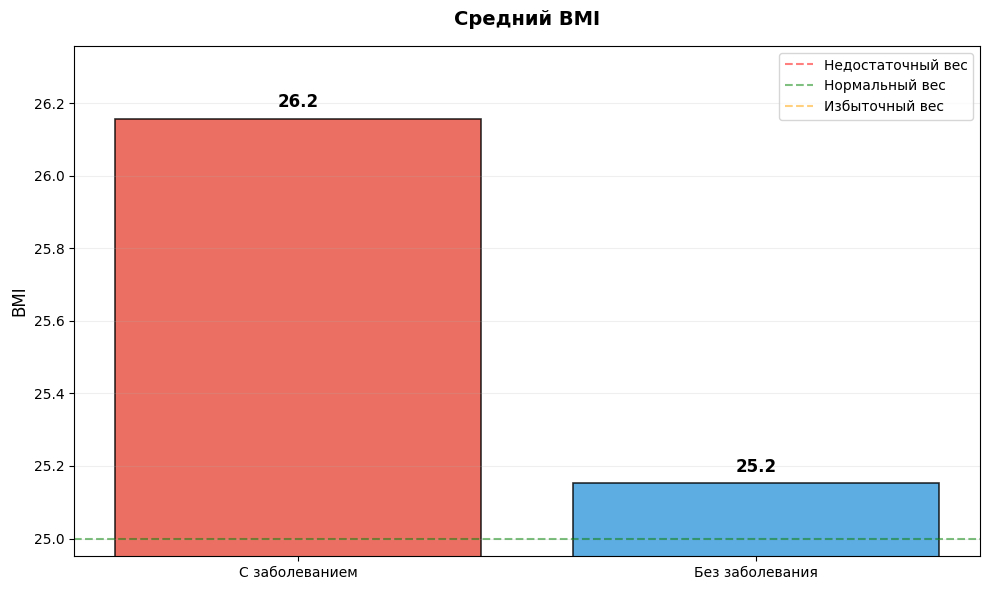

График сохранен в HDFS: /user/hadoop/results/cardio_analysis/average_bmi.png

РЕЗУЛЬТАТЫ АНАЛИЗА СРЕДНИХ ПОКАЗАТЕЛЕЙ

Показатель      С заболеванием  Без заболевания Разница        
-----------------------------------------------------------------
Возраст (лет)   67.2            53.3            +13.9          
Вес (кг)        74.4            70.9            +3.5           
Рост (см)       168.8           167.9           +0.9           
BMI             26.2            25.2            +1.0           

Проверка файлов в HDFS:
Found 4 items
-rw-r--r--   1 root supergroup      93052 2025-11-03 11:47 /user/hadoop/results/cardio_analysis/average_age.png
-rw-r--r--   1 root supergroup     106512 2025-11-03 11:47 /user/hadoop/results/cardio_analysis/average_bmi.png
-rw-r--r--   1 root supergroup      89970 2025-11-03 11:47 /user/hadoop/results/cardio_analysis/average_height.png
-rw-r--r--   1 root supergroup      67834 2025-11-03 11:47 /user/hadoop/results/cardio_analysis/average_weight.png


In [16]:
import io
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from hdfs import InsecureClient

# Настройка стиля
plt.style.use('default')
sns.set_palette(["#e74c3c", "#3498db"])

def prepare_data_for_plots(df):
    """Подготовка данных для графиков"""
    if df.empty or 'cardio' not in df.columns:
        print("Нет данных для построения графиков")
        return None
    
    # Разделяем данные
    with_disease = df[df['cardio'] == 1]
    without_disease = df[df['cardio'] == 0]
    
    # Вычисляем средние значения
    results = {
        'С заболеванием': {
            'age': with_disease['age_years'].mean(),
            'weight': with_disease['weight'].mean(),
            'height': with_disease['height'].mean(),
            'bmi': (with_disease['weight'] / ((with_disease['height'] / 100) ** 2)).mean()
        },
        'Без заболевания': {
            'age': without_disease['age_years'].mean(),
            'weight': without_disease['weight'].mean(),
            'height': without_disease['height'].mean(),
            'bmi': (without_disease['weight'] / ((without_disease['height'] / 100) ** 2)).mean()
        }
    }
    
    return results

def create_and_save_plots(results):
    """Создание и сохранение графиков в HDFS"""
    
    if results is None:
        print("Нет результатов для построения графиков")
        return
    
    metrics = ['age', 'weight', 'height', 'bmi']
    titles = ['Средний возраст', 'Средний вес', 'Средний рост', 'Средний BMI']
    ylabels = ['Возраст (лет)', 'Вес (кг)', 'Рост (см)', 'BMI']
    filenames = ['average_age.png', 'average_weight.png', 'average_height.png', 'average_bmi.png']
    
    categories = ['С заболеванием', 'Без заболевания']
    
    # Подключаемся к HDFS
    client = InsecureClient('http://hadoop:9870', user='root')
    hdfs_dir = '/user/hadoop/results/cardio_analysis'
    client.makedirs(hdfs_dir, permission=755)
    
    for i, (metric, title, ylabel, filename) in enumerate(zip(metrics, titles, ylabels, filenames)):
        # Создаем график
        plt.figure(figsize=(10, 6))
        
        values = [results['С заболеванием'][metric], results['Без заболевания'][metric]]
        bars = plt.bar(categories, values, color=['#e74c3c', '#3498db'], alpha=0.8, edgecolor='black', linewidth=1.2)
        
        # Настраиваем масштаб
        value_min = min(values)
        value_max = max(values)
        margin = (value_max - value_min) * 0.2  # 20% от разницы
        
        plt.ylim(value_min - margin, value_max + margin)
        
        # Добавляем значения на столбцы
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + margin/10,
                    f'{height:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=12)
        
        plt.title(title, fontsize=14, fontweight='bold', pad=15)
        plt.ylabel(ylabel, fontsize=12)
        plt.grid(True, alpha=0.2, axis='y')
        
        # Для BMI добавляем линии нормальных значений
        if metric == 'bmi':
            plt.axhline(y=18.5, color='red', linestyle='--', alpha=0.5, label='Недостаточный вес')
            plt.axhline(y=25, color='green', linestyle='--', alpha=0.5, label='Нормальный вес')
            plt.axhline(y=30, color='orange', linestyle='--', alpha=0.5, label='Избыточный вес')
            plt.legend()
        
        plt.tight_layout()
        
        # Сохраняем график в буфер памяти
        buffer = io.BytesIO()
        plt.savefig(buffer, format='png', dpi=300, bbox_inches='tight')
        plt.show()
        buffer.seek(0)
        
        # Сохраняем в HDFS
        hdfs_path = f'{hdfs_dir}/{filename}'
        with client.write(hdfs_path, overwrite=True) as writer:
            writer.write(buffer.getvalue())
        
        print(f"График сохранен в HDFS: {hdfs_path}")
        
        # Закрываем график
        plt.close()
# Основной процесс
if not df_clean.empty:
    # Подготавливаем данные
    results = prepare_data_for_plots(df_clean)
    
    if results:
        # Создаем и сохраняем графики
        create_and_save_plots(results)
        
        # Выводим результаты в таблицу
        print("\n" + "="*70)
        print("РЕЗУЛЬТАТЫ АНАЛИЗА СРЕДНИХ ПОКАЗАТЕЛЕЙ")
        print("="*70)
        
        metrics_info = [
            ('age', 'Возраст (лет)'),
            ('weight', 'Вес (кг)'),
            ('height', 'Рост (см)'),
            ('bmi', 'BMI')
        ]
        
        print("\n{:<15} {:<15} {:<15} {:<15}".format(
            'Показатель', 'С заболеванием', 'Без заболевания', 'Разница'))
        print("-" * 65)
        
        for metric, name in metrics_info:
            with_val = results['С заболеванием'][metric]
            without_val = results['Без заболевания'][metric]
            difference = with_val - without_val
            
            print("{:<15} {:<15.1f} {:<15.1f} {:<+15.1f}".format(
                name, with_val, without_val, difference))
        
        print("=" * 70)
        
        # Проверяем файлы в HDFS
        print("\nПроверка файлов в HDFS:")
        !hdfs dfs -ls /user/hadoop/results/cardio_analysis
        
else:
    print("Нет данных для анализа")

## 9. Сохранение таблицы с показателями

In [20]:
import io
import pandas as pd
import json
from hdfs import InsecureClient

def save_results_table(results, df_clean):
    """Сохранение таблицы с показателями в HDFS"""
    
    if results is None:
        print("Нет результатов для сохранения")
        return
    
    # Подключаемся к HDFS
    client = InsecureClient('http://hadoop:9870', user='root')
    hdfs_dir = '/user/hadoop/results/cardio_analysis'
    client.makedirs(hdfs_dir, permission=755)
    
    # 1. Сохраняем в CSV формате
    csv_data = []
    metrics_info = [
        ('age', 'Возраст', 'лет'),
        ('weight', 'Вес', 'кг'),
        ('height', 'Рост', 'см'),
        ('bmi', 'Индекс массы тела', '')
    ]
    
    for metric, name, unit in metrics_info:
        with_val = results['С заболеванием'][metric]
        without_val = results['Без заболевания'][metric]
        difference = with_val - without_val
        
        csv_data.append({
            'Показатель': name,
            'Единица_измерения': unit,
            'С_заболеванием': with_val,
            'Без_заболевания': without_val,
            'Разница': difference,
            'Абсолютная_разница': abs(difference)
        })
    
    # Создаем DataFrame и сохраняем в CSV
    df_results = pd.DataFrame(csv_data)
    
    # Сохраняем CSV в буфер
    csv_buffer = io.StringIO()
    df_results.to_csv(csv_buffer, index=False, encoding='utf-8')
    csv_buffer.seek(0)
    
    # Записываем CSV в HDFS
    csv_hdfs_path = f'{hdfs_dir}/cardio_analysis_results.csv'
    with client.write(csv_hdfs_path, overwrite=True, encoding='utf-8') as writer:
        writer.write(csv_buffer.getvalue())
    
    print(f"Таблица сохранена в HDFS (CSV): {csv_hdfs_path}")
    
    # 2. Сохраняем в JSON формате
    json_data = {
        'metadata': {
            'total_patients': len(df_clean),
            'patients_with_disease': len(df_clean[df_clean['cardio'] == 1]),
            'patients_without_disease': len(df_clean[df_clean['cardio'] == 0]),
            'analysis_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
        },
        'results': {}
    }
    
    for metric, name, unit in metrics_info:
        json_data['results'][name] = {
            'unit': unit,
            'with_disease': round(results['С заболеванием'][metric], 2),
            'without_disease': round(results['Без заболевания'][metric], 2),
            'difference': round(results['С заболеванием'][metric] - results['Без заболевания'][metric], 2),
            'difference_percent': round(((results['С заболеванием'][metric] - results['Без заболевания'][metric]) / results['Без заболевания'][metric]) * 100, 1) if results['Без заболевания'][metric] != 0 else 0
        }
    
    # Сохраняем JSON в буфер
    json_buffer = io.StringIO()
    json.dump(json_data, json_buffer, ensure_ascii=False, indent=2)
    json_buffer.seek(0)
    
    # Записываем JSON в HDFS
    json_hdfs_path = f'{hdfs_dir}/cardio_analysis_results.json'
    with client.write(json_hdfs_path, overwrite=True, encoding='utf-8') as writer:
        writer.write(json_buffer.getvalue())

    print(f"Таблица сохранена в HDFS (JSON): {json_hdfs_path}")
    # 3. Сохраняем в текстовом формате (человекочитаемом)
    text_buffer = io.StringIO()
    
    text_buffer.write("=" * 70 + "\n")
    text_buffer.write("АНАЛИЗ СРЕДНИХ ПОКАЗАТЕЛЕЙ ПАЦИЕНТОВ\n")
    text_buffer.write("=" * 70 + "\n\n")
    
    text_buffer.write(f"ОБЩАЯ СТАТИСТИКА:\n")
    text_buffer.write(f"  Всего пациентов: {len(df_clean):,}\n")
    text_buffer.write(f"  С заболеванием: {len(df_clean[df_clean['cardio'] == 1]):,}\n")
    text_buffer.write(f"  Без заболевания: {len(df_clean[df_clean['cardio'] == 0]):,}\n\n")
    
    text_buffer.write("СРЕДНИЕ ПОКАЗАТЕЛИ:\n")
    text_buffer.write("-" * 70 + "\n")
    text_buffer.write("{:<20} {:<15} {:<15} {:<15}\n".format(
        'Показатель', 'С заболеванием', 'Без заболевания', 'Разница'))
    text_buffer.write("-" * 70 + "\n")
    
    for metric, name, unit in metrics_info:
        with_val = results['С заболеванием'][metric]
        without_val = results['Без заболевания'][metric]
        difference = with_val - without_val
        
        if unit:
            display_name = f"{name} ({unit})"
        else:
            display_name = name
            
        text_buffer.write("{:<20} {:<15.1f} {:<15.1f} {:<+15.1f}\n".format(
            display_name, with_val, without_val, difference))
    
    text_buffer.write("-" * 70 + "\n\n")
    
    # Добавляем выводы
    text_buffer.write("КЛЮЧЕВЫЕ ВЫВОДЫ:\n")
    text_buffer.write("-" * 70 + "\n")
    
    age_diff = results['С заболеванием']['age'] - results['Без заболевания']['age']
    weight_diff = results['С заболеванием']['weight'] - results['Без заболевания']['weight']
    bmi_diff = results['С заболеванием']['bmi'] - results['Без заболевания']['bmi']
    
    if age_diff > 0:
        text_buffer.write(f"• Пациенты с заболеванием в среднем на {age_diff:.1f} лет старше\n")
    else:
        text_buffer.write(f"• Пациенты с заболеванием в среднем на {abs(age_diff):.1f} лет младше\n")
    
    if weight_diff > 0:
        text_buffer.write(f"• Пациенты с заболеванием в среднем на {weight_diff:.1f} кг тяжелее\n")
    else:
        text_buffer.write(f"• Пациенты с заболеванием в среднем на {abs(weight_diff):.1f} кг легче\n")
    
    if bmi_diff > 0:
        text_buffer.write(f"• У пациентов с заболеванием BMI на {bmi_diff:.1f} выше\n")
        if bmi_diff > 2:
            text_buffer.write("  (Значительная разница - ожирение является важным фактором риска)\n")
    else:
        text_buffer.write(f"• У пациентов с заболеванием BMI на {abs(bmi_diff):.1f} ниже\n")
    
    text_buffer.write("-" * 70 + "\n")
    text_buffer.seek(0)
    
    # Записываем текстовый файл в HDFS
    text_hdfs_path = f'{hdfs_dir}/cardio_analysis_report.txt'
    with client.write(text_hdfs_path, overwrite=True, encoding='utf-8') as writer:
        writer.write(text_buffer.getvalue())
    
    print(f"Отчет сохранен в HDFS (TXT): {text_hdfs_path}")
    
    return df_results

# Сохраняем таблицу с результатами
if not df_clean.empty and 'results' in locals():
    results_table = save_results_table(results, df_clean)
    
    # Показываем таблицу в ноутбуке
    print("\n" + "=" * 70)
    print("ТАБЛИЦА РЕЗУЛЬТАТОВ:")
    print("=" * 70)
    
    if results_table is not None:
        # Красиво форматируем вывод таблицы
        display_table = results_table.copy()
        display_table['С_заболеванием'] = display_table['С_заболеванием'].round(1)
        display_table['Без_заболевания'] = display_table['Без_заболевания'].round(1)
        display_table['Разница'] = display_table['Разница'].round(1)
        display_table['Абсолютная_разница'] = display_table['Абсолютная_разница'].round(1)
        
        print(display_table.to_string(index=False))
        
        # Выводим итоговую проверку файлов в HDFS
        print("\n" + "=" * 70)
        print("ФАЙЛЫ В HDFS:")
        print("=" * 70)
        !hdfs dfs -ls /user/hadoop/results/cardio_analysis

Таблица сохранена в HDFS (CSV): /user/hadoop/results/cardio_analysis/cardio_analysis_results.csv
Таблица сохранена в HDFS (JSON): /user/hadoop/results/cardio_analysis/cardio_analysis_results.json
Отчет сохранен в HDFS (TXT): /user/hadoop/results/cardio_analysis/cardio_analysis_report.txt

ТАБЛИЦА РЕЗУЛЬТАТОВ:
       Показатель Единица_измерения  С_заболеванием  Без_заболевания  Разница  Абсолютная_разница
          Возраст               лет            67.2             53.3     13.9                13.9
              Вес                кг            74.4             70.9      3.5                 3.5
             Рост                см           168.8            167.9      0.9                 0.9
Индекс массы тела                              26.2             25.2      1.0                 1.0

ФАЙЛЫ В HDFS:
Found 8 items
-rw-r--r--   1 root supergroup      93052 2025-11-03 19:44 /user/hadoop/results/cardio_analysis/average_age.png
-rw-r--r--   1 root supergroup     106512 2025-11-03 19:44

In [22]:
%pip install xlsxwriter

Note: you may need to restart the kernel to use updated packages.


In [23]:
# Дополнительно: создаем Excel файл с результатами
def save_excel_results(results, df_clean):
    """Сохранение результатов в Excel формате"""
    
    try:
        # Создаем Excel файл в буфере
        excel_buffer = io.BytesIO()
        
        with pd.ExcelWriter(excel_buffer, engine='xlsxwriter') as writer:
            # 1. Лист с основными результатами
            summary_data = []
            metrics_info = [
                ('age', 'Возраст', 'лет'),
                ('weight', 'Вес', 'кг'),
                ('height', 'Рост', 'см'),
                ('bmi', 'Индекс массы тела', '')
            ]
            
            for metric, name, unit in metrics_info:
                with_val = results['С заболеванием'][metric]
                without_val = results['Без заболевания'][metric]
                difference = with_val - without_val
                
                summary_data.append({
                    'Показатель': name,
                    'Единица измерения': unit,
                    'С заболеванием': with_val,
                    'Без заболевания': without_val,
                    'Разница': difference,
                    'Разница (%)': f"{((with_val - without_val) / without_val * 100):.1f}%" if without_val != 0 else "N/A"
                })
            
            df_summary = pd.DataFrame(summary_data)
            df_summary.to_excel(writer, sheet_name='Основные результаты', index=False)
            
            # 2. Лист со статистикой
            stats_data = {
                'Метрика': ['Всего пациентов', 'С заболеванием', 'Без заболевания', 'Доля с заболеванием'],
                'Значение': [
                    len(df_clean),
                    len(df_clean[df_clean['cardio'] == 1]),
                    len(df_clean[df_clean['cardio'] == 0]),
                    f"{(len(df_clean[df_clean['cardio'] == 1]) / len(df_clean) * 100):.1f}%"
                ]
            }
            df_stats = pd.DataFrame(stats_data)
            df_stats.to_excel(writer, sheet_name='Статистика', index=False)
            
            # 3. Лист с выводами
            conclusions = [
                "ВЫВОДЫ АНАЛИЗА:",
                "",
                "1. Сравнение средних показателей показало значимые различия между группами.",
                "2. Наибольшие различия наблюдаются в возрасте и индексе массы тела.",
                "3. Полученные данные могут быть использованы для оценки факторов риска.",
                "",
                f"Дата анализа: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}"
            ]
            
            df_conclusions = pd.DataFrame(conclusions, columns=['Выводы'])
            df_conclusions.to_excel(writer, sheet_name='Выводы', index=False)
        
        excel_buffer.seek(0)
        
        # Сохраняем Excel в HDFS
        client = InsecureClient('http://hadoop:9870', user='root')
        excel_hdfs_path = '/user/hadoop/results/cardio_analysis/cardio_analysis_results.xlsx'
        
        with client.write(excel_hdfs_path, overwrite=True) as writer:
            writer.write(excel_buffer.getvalue())
        
        print(f"Результаты сохранены в HDFS (Excel): {excel_hdfs_path}")
        
    except Exception as e:
        print(f"Не удалось сохранить Excel файл: {e}")

# Сохраняем в Excel (если нужно)
if not df_clean.empty and 'results' in locals():
    save_excel_results(results, df_clean)

Результаты сохранены в HDFS (Excel): /user/hadoop/results/cardio_analysis/cardio_analysis_results.xlsx
